# **Trabajo Practico 2 - Clasificación - AA1**


# 🌧 **Predicción de lluvia en Australia** 🌧
---



---


## **Integrantes**

* Cima, Nancy Lucía - nancy.cima.bertoni@hotmail.com
* Longo, Gonzalo - longogonzalo.g@gmail.com
* Sumiacher, Julia - jsumiacher@gmail.com




## **Introducción**

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos años, incluyendo si para el día siguiente llovió o no en la columna ‘RainTomorrow’. El objetivo es la predicción de esta variable en función del resto de las características.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en una cierta cantidad de ciudades. Pueden considerarse como una única ubicación. Descartar los datos del resto de las ciudades no elegidas.

Para elegir las ciudades, obtener los valores únicos de la columna Location del DataFrame y ejecutar una línea de código donde se elijan de manera aleatoria 10 ciudades de esos valores. Quedarse con estas ciudades para todo el trabajo práctico.

## **Consignas prácticas**

1. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas, detallando: características, comportamiento y rango de variación. ¿Qué es cada variable?

Debe incluir (estos ítems no están necesariamente en orden):
* Análisis y decisión sobre datos faltantes.
* Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
* ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
* Codificación de variables categóricas (si se van a utilizar para predicción).
* Matriz de correlación de variables.
* Estandarización/escalado de datos.
* Validación cruzada train - test. Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde lo crean adecuado.

2.
* Implementar la solución del problema de clasificación con regresión logística.

* Obtener las métricas adecuadas (accuracy, precision, recall, F1 score, entre otras, ¡investiguen adicionales!).  Graficar matrices de confusión para cada modelo. Analizar “falsos negativos” y “falsos positivos”, ¿qué significa cada uno?

* Trazar curvas ROC para cada modelo. Comenten cuáles serían los umbrales adecuados a utilizar; ¿cómo podrían calcular el mejor umbral? ¿Es 0.5 el mejor?

* ¿Creen que han conseguido un buen fitting?

3. Implementar un modelo base.
Repetir los pasos del ítem 2.

4.	Optimizar la selección de hiperparámetros.

* Probar validación cruzada k-folds, si corresponde.

*	Utilizar grid search, random search u optuna. Justificar su uso. Justificar los hiperparámetros que se están optimizando.

5.	Implementar explicabilidad de los modelos.
* Utilizar SHAP o similar. Implementar al menos dos gráficas a nivel local y dos gráficas a nivel global. ¡Escribir lo que se observa!
* ¿Cuáles son las variables más importantes? ¿Cuáles son las menos?

6.	Implementar un modelo de AutoML con scikit-learn. ¿Qué observa?



In [1]:
# Importamos librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from scipy import stats as st

## **1. Análisis descriptivo**

### **Análisis del dataset**

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1j1ic5wuePzr5iD5IWEYStsVDVaYg154P'
gdown.download(url, 'weatherAUS.csv', quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1j1ic5wuePzr5iD5IWEYStsVDVaYg154P
To: /content/weatherAUS.csv
100%|██████████| 14.1M/14.1M [00:00<00:00, 107MB/s] 


'weatherAUS.csv'

In [3]:
#Cargamos el dataset
data = pd.read_csv('weatherAUS.csv')
df = data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


El significado de cada columna es el siguiente:

**Características de entrada en orden:**  
1- Date: La fecha en la que se registró.

2- Location: La ciudad en Australia.

3- MinTemp: Temperatura mínima registrada ese día (en grados).

4- MaxTemp: Temperatura máxima registrada ese día (en grados).

5- Rainfall: Cantidad de lluvia registrada ese día (en mm).

6- Evaporation: Cantidad de agua evaporada ese día (en mm).

7- Sunshine: Número de horas de sol.

8- WindGustDir: Dirección del viento durante la ráfaga más fuerte.

9- WindGustSpeed: Velocidad de la ráfaga de viento más fuerte (en km/h).

10- WindDir9am: Dirección del viento a las 9 de la mañana.

11- WindDir3pm: Dirección del viento a las 3 de la tarde.

12- WindSpeed9am: Velocidad del viento a las 9 de la mañana (en km/h).

13- WindSpeed3pm: Velocidad del viento a las 3 de la tarde (en km/h).

14- Humidity9am: Porcentaje de humedad relativa a las 9 de la mañana (en %).

15- Humidity3pm: Porcentaje de humedad relativa a las 3 de la tarde (en %).

16- Pressure9am: Presión atmosférica a las 9 de la mañana (en hPa).

17- Pressure3pm: Presión atmosférica a las 3 de la tarde (en hPa).

18- Cloud9am: Cobertura de nubes a las 9 de la mañana (en octas, de 0 a 8).

19- Cloud3pm: Cobertura de nubes a las 3 de la tarde (en octas, de 0 a 8).

20- Temp9am: Temperatura a las 9 de la mañana (en grados).

21- Temp3pm: Temperatura a las 3 de la tarde (en grados).

22- RainToday: Indica si llovió hoy.


**Variable de salida (target):**  
23- RainTomorrow: Variable objetivo que indica si lloverá al día siguiente.

In [4]:
#Analizamos el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Notamos que hay columnas numericas y categoricas. Además, la mayoria de las columnas tienen valores faltantes, incluyendo la columna target.

### **Selección de Ciudades**

Antes de continuar y tratar estos valores faltantes, seleccionaremos 10 ciudades aleatorias del dataset; con estas mismas trabajaremos en todo el trabajo práctico. Serán consideradas como una única ubicacion.

In [5]:
#Obtenemos todas las ciudades distintas
unique_locations = df['Location'].unique()

# Seleccionmos aleatoriamente 10 ciudades
ciudades_seleccionadas = pd.Series(unique_locations).sample(n=10, random_state=40).tolist()

# Filtramos el DataFrame para quedarnos solo con las ciudades seleccionadas
df = df[df['Location'].isin(ciudades_seleccionadas)]

# Mostramos las 10 ciudades con las que nos quedamos
print("Ciudades Seleccionadas: ")
for ciudad in ciudades_seleccionadas:
    print(ciudad)

Ciudades Seleccionadas: 
Uluru
Tuggeranong
Cairns
Launceston
Albury
Moree
AliceSprings
SydneyAirport
Cobar
Woomera


### **Datos Faltantes**

In [6]:
#Definimos funcion para analizar faltantes
def tabla_NaN(data):
    """
    Muestra un tabla con la cantidad y el porcentaje
    de datos faltantes en cada columna.
    """
    cant = data.isna().sum()
    prop = round(cant / len(df) * 100,2)
    d = {'cantidad_NaN':cant,
     '%_NaN': prop}
    tabla = pd.DataFrame(d)
    return tabla

In [7]:
#Vemos la cantidad y proporcion de datos faltantes de cada columna
tabla_NaN(df)

,cantidad_NaN,%_NaN
Date,0,0.00
Location,0,0.00
MinTemp,68,0.24
MaxTemp,36,0.12
Rainfall,396,1.37
Evaporation,12686,44.03
Sunshine,16124,55.96
WindGustDir,442,1.53
WindGustSpeed,439,1.52
WindDir9am,2141,7.43


In [8]:
#Antes que nada vemos si tenemos una fila completa de valores faltantes
df.isna().all(axis=1).sum()

0

No hay filas llenas completamente de nulos, pero sí notamos que alrededor de un 1.38% de los datos tiene un valor faltante en la variable target. Estos datos no nos servirán para nuestro modelo, ya que necesitamos predecir sobre valores reales, así que los eliminaremos.

In [9]:
#Eliminamos las filas con valores nulos en la variable target
filas = df[df['RainTomorrow'].isna()].index
df.drop(filas, inplace=True)

In [10]:
#Vemos la cantidad de filas resultantes
len(df)

28414

In [11]:
#Vemos nuevamente la tabla de valores faltantes
tabla_NaN(df)

,cantidad_NaN,%_NaN
Date,0,0.00
Location,0,0.00
MinTemp,26,0.09
MaxTemp,9,0.03
Rainfall,197,0.69
Evaporation,12388,43.60
Sunshine,15737,55.38
WindGustDir,347,1.22
WindGustSpeed,344,1.21
WindDir9am,2100,7.39


En varias columnas aún encontramos datos faltantes. Dado que eliminar estos datos implicaría perder más del 5% de la información, lo que sería significativo, optamos por imputarlos. Para hacerlo de manera adecuada, es importante analizar con más detalle el comportamiento de las variables.

Decidimos llenar los valores faltantes utilizando la mediana, la media o la moda, dependiendo de la columna, agrupando los datos por mes. Este enfoque nos permite capturar los patrones estacionales que suelen estar presentes en datos climáticos.

Por ejemplo, las temperaturas de diciembre pueden ser muy distintas a las de junio, por lo que rellenar con una mediana o moda general, sin tener en cuenta el mes, no reflejaría correctamente esas variaciones estacionales. Al agrupar por mes, los valores faltantes se completan de manera más acorde al contexto temporal en el que deberían encontrarse.

Este método también nos ayuda a evitar la imputación con datos "atípicos" para un mes o estación del año específicos.

Se elegirá la mediana, media o moda según el tipo de variable: si es categórica o numérica. En caso de ser una variable categórica, se utilizará la moda. Por otro lado, en el caso de las variables numéricas, se evaluará si presentan una cantidad significativa de valores atípicos (outliers).

No se utilizó KNN vecinos ya que tiene un costo computacional muy alto.

Sin embargo, consideramos que los casos de las columnas 'Evaporation' y 'Sunshine' son excesivos, con un 43.60% y 55.38% de datos faltantes respectivamente. En consecuencia, decidimos no incluir estas columnas en nuestro análisis.

In [12]:
# Eliminamos las columnas 'Evaporation' y 'Sunshine'
df.drop(columns= ['Evaporation', 'Sunshine'], inplace = True)

Para lograr realizar la imputación planteada, primero agregamos las columnas 'Date' y 'Mes'.

In [13]:
#Convertimos el tipo de dato de Date a datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05
...,...
145454,2017-06-20
145455,2017-06-21
145456,2017-06-22
145457,2017-06-23


In [14]:
# Agregamos una columna nueva con el mes de cada fecha
df['Month'] = df['Date'].dt.month

#Quitamos Date del conjunto porque ya no lo necesitamos.
df.drop(['Date'], axis=1, inplace=True)

In [15]:
# Visualizamos las columnas resultates
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')

Una vez tenemos la columnas que necesitaremos para la imputación, hacemos la división de los datos de entrenamiento y test para evitar la contaminación train-test.

### **Validación cruzada train - test**

In [16]:
# Dividimos los datos en train, test y validacion
X_train, X_test, y_train, y_test = train_test_split(df.drop('RainTomorrow', axis=1),
                                             df['RainTomorrow'].values.reshape(-1,1),
                                             test_size=0.3,
                                             random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size= 0.5, random_state= 41)

Una vez dividido el dataset lo visualizaremos y veremos mejor su distribucion.

### **Visualización de datos**

In [17]:
#Observamos medidas descriptivas de cada variable explicativa numerica
round(X_train.describe(),2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
count,19869.00,19882.00,19757.00,19654.00,19804.00,19807.00,19762.00,19758.00,19030.00,19038.00,12933.00,12982.00,19859.00,19866.00,19889.00
mean,12.66,25.16,2.01,38.97,14.17,18.08,62.34,42.33,1017.49,1014.58,3.86,4.03,17.89,23.79,6.38
std,7.21,7.58,8.20,12.62,8.80,8.39,21.90,21.97,6.88,6.76,3.00,2.80,7.25,7.38,3.42
min,-8.20,4.10,0.00,6.00,0.00,0.00,1.00,0.00,985.00,980.20,0.00,0.00,-2.30,3.40,1.00
25%,7.10,19.00,0.00,31.00,7.00,11.00,49.00,25.00,1012.80,1009.90,1.00,1.00,12.30,17.90,3.00
50%,12.60,25.20,0.00,37.00,13.00,17.00,64.00,40.00,1017.40,1014.50,3.00,4.00,17.80,23.70,6.00
75%,18.60,30.70,0.20,46.00,20.00,24.00,79.00,57.00,1022.10,1019.10,7.00,7.00,23.50,29.20,9.00
max,31.40,48.10,268.60,122.00,69.00,67.00,100.00,100.00,1040.50,1039.60,8.00,9.00,38.00,46.70,12.00


Visualizamos la distribución de cada columna, diferenciando entre ciudades.

In [18]:
# Seleccionamos columnas numéricas y categóricas
numeric_columns = X_train.select_dtypes(include=['float64', 'int32', 'int64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

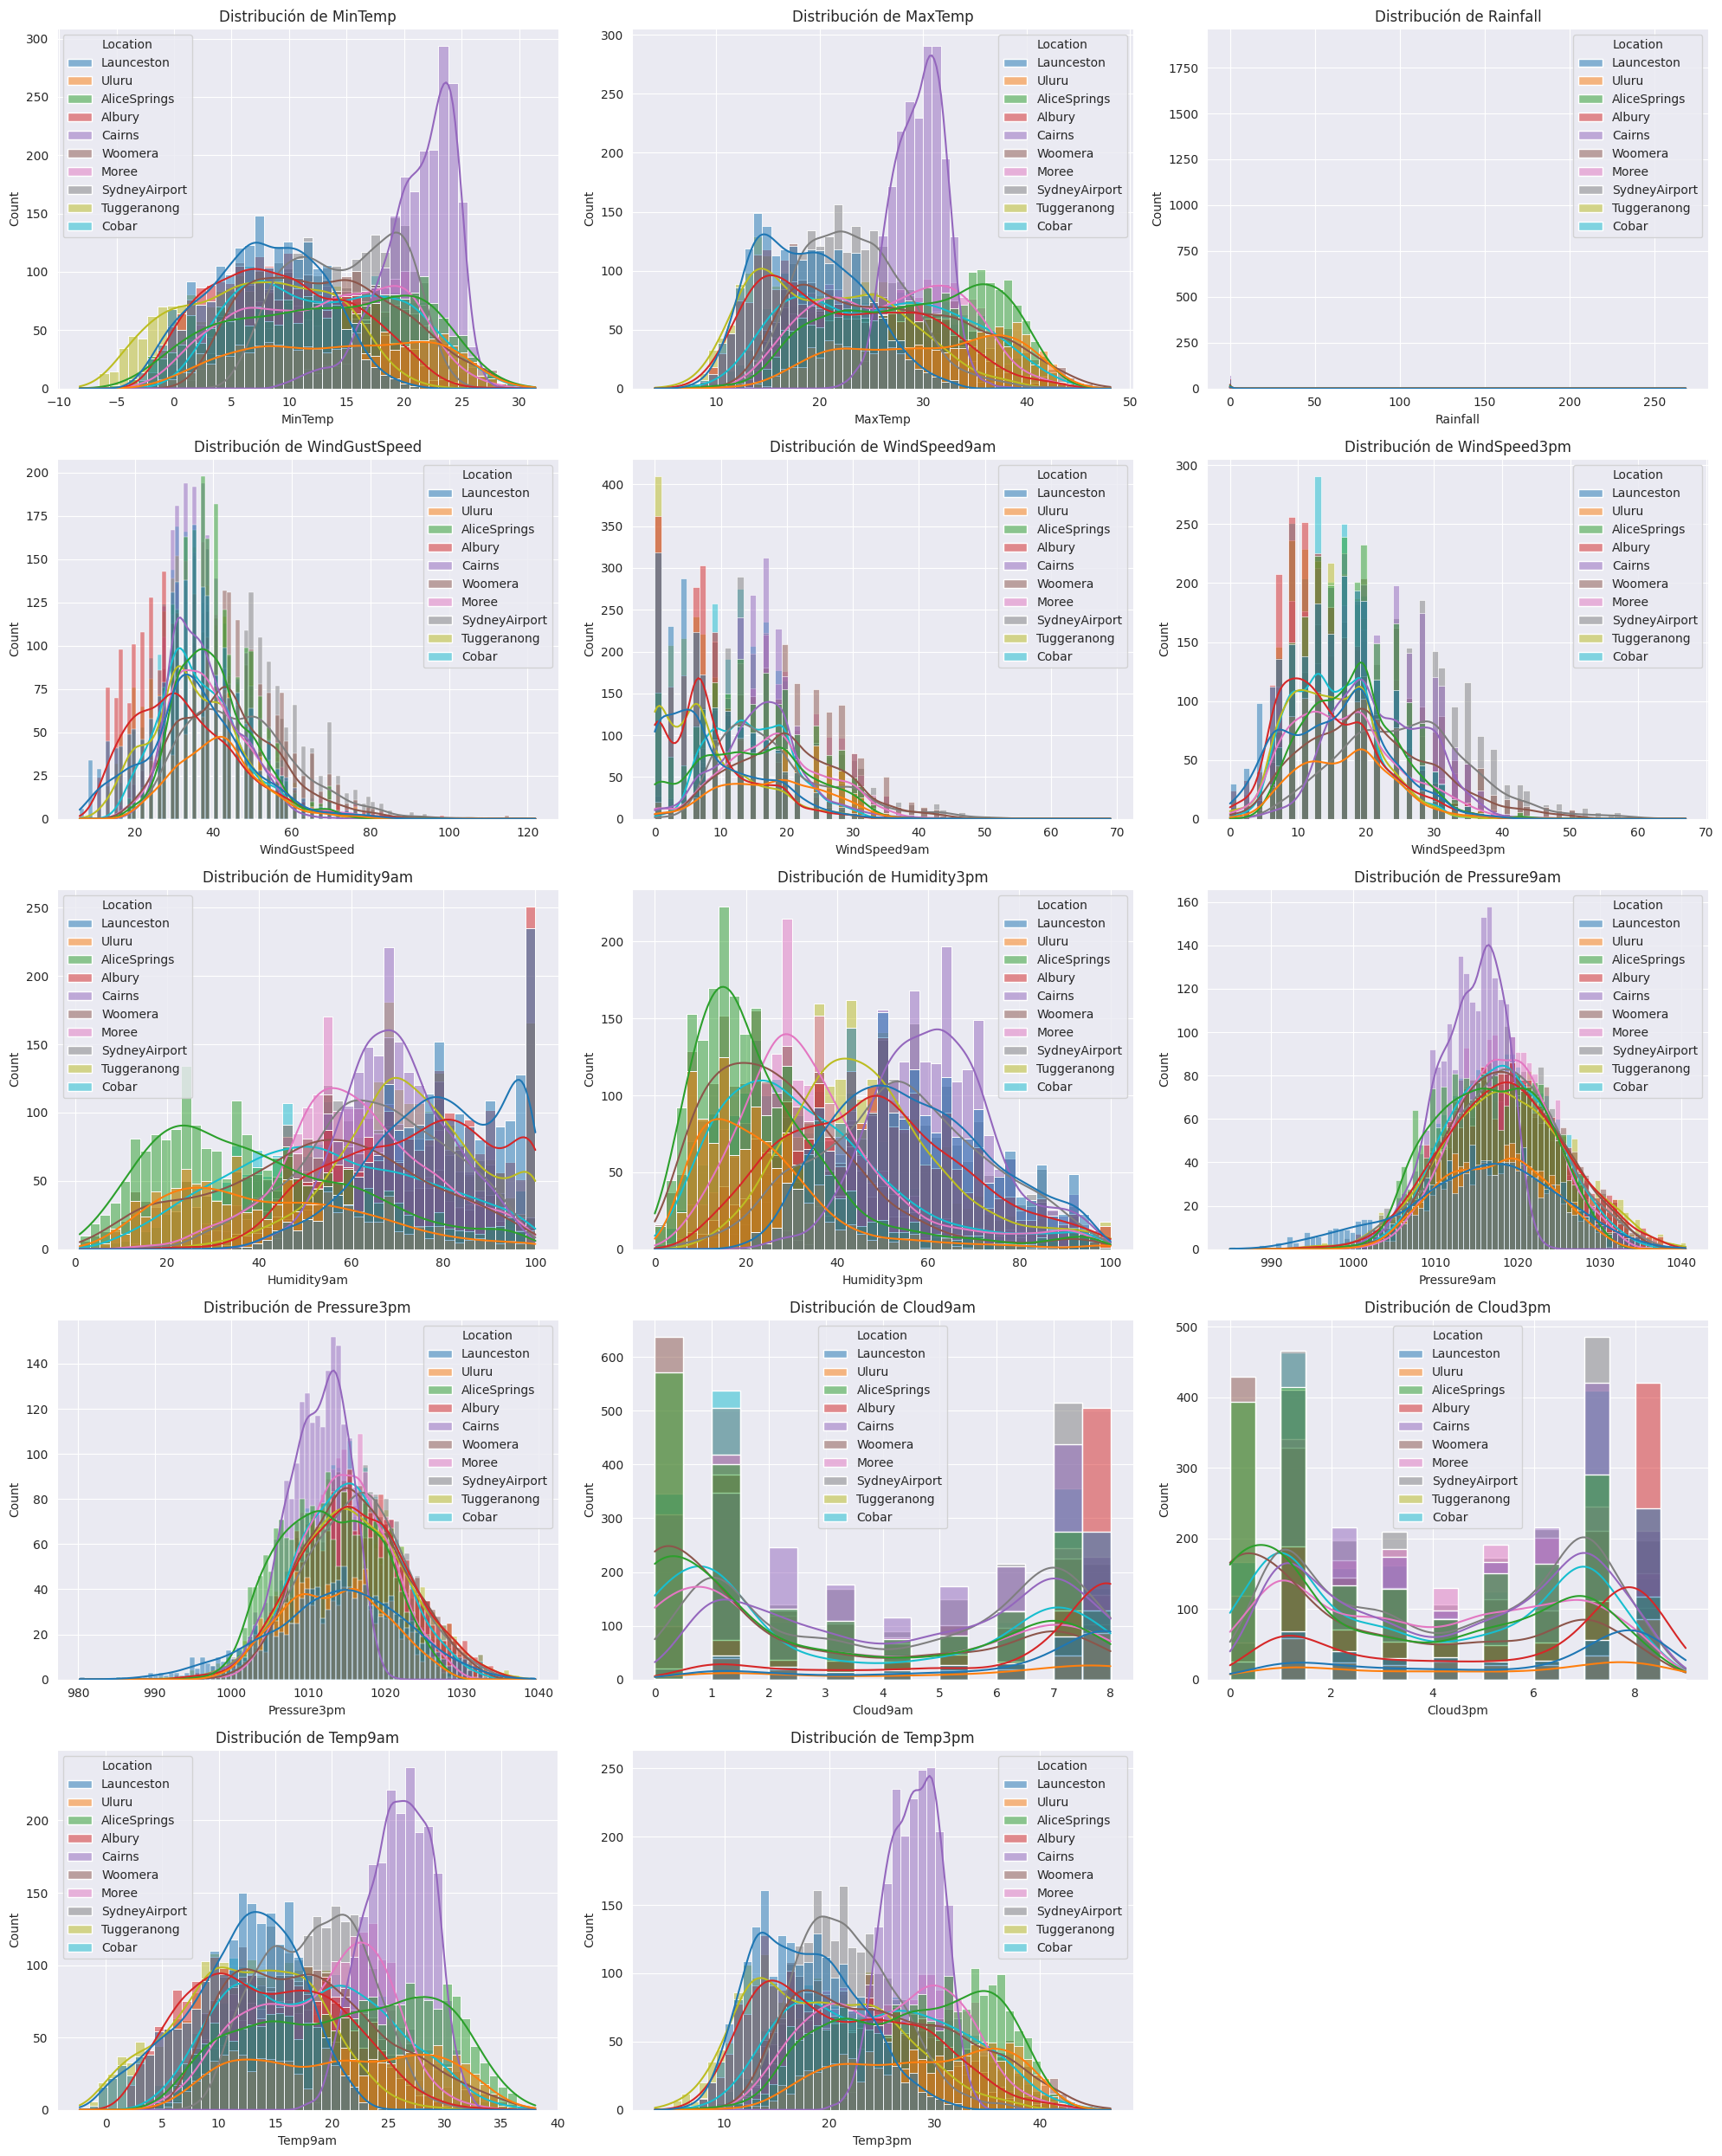

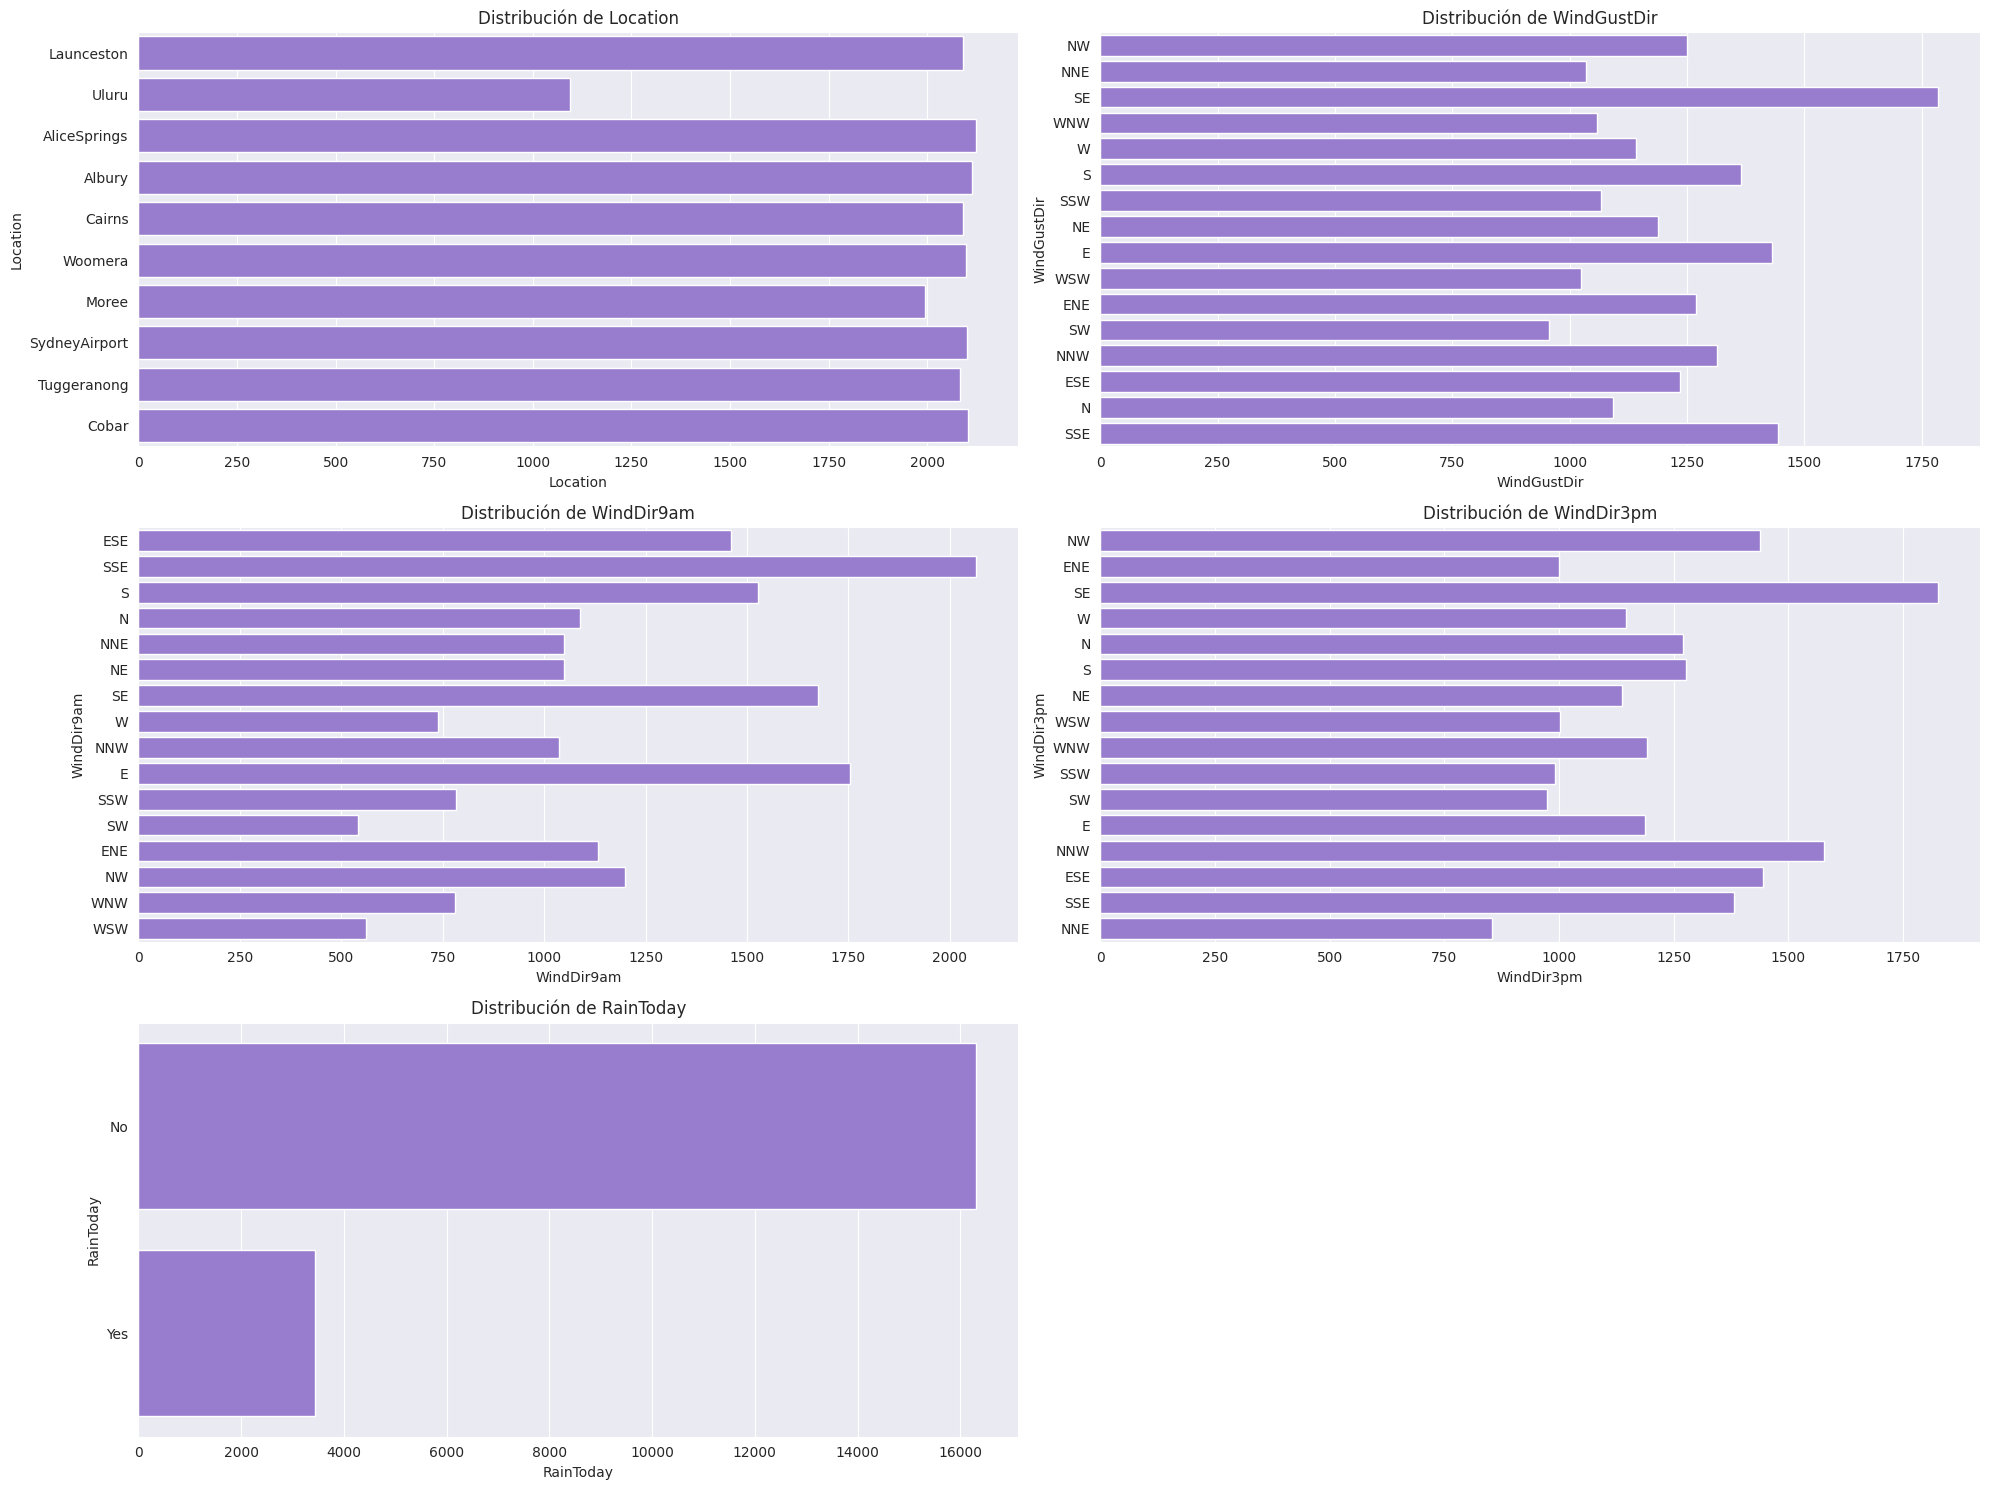

In [19]:
# Configuramos estilo de seaborn
sns.set_style("darkgrid")

# Función para crear subplots y gráficos
def create_plots(columns, plot_func, n_cols=3):
    n_rows = math.ceil(len(columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, column in enumerate(columns):
        plot_func(column, axes[i])
        axes[i].set_title(f'Distribución de {column}', fontsize=12)
        axes[i].set_xlabel(column, fontsize=10)

    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Gráficos para variables numéricas (histograma) y categóricas (barras)
numeric_columns_sin_month = numeric_columns.drop('Month')
create_plots(numeric_columns_sin_month , lambda col, ax: sns.histplot(X_train, x=col, kde=True, ax=ax, hue=X_train['Location']))
create_plots(categorical_columns, lambda col, ax: sns.countplot(y=col, data=X_train, ax=ax, color='mediumpurple'), n_cols=2)

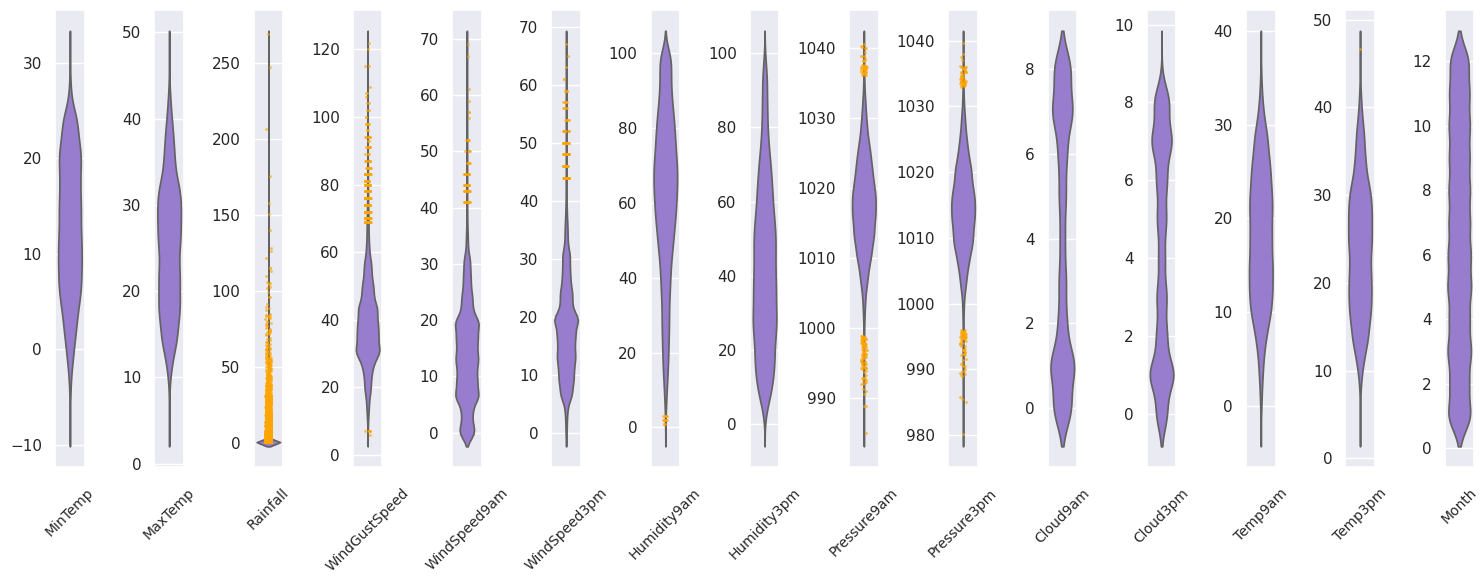

In [20]:
sns.set(style="darkgrid")

# Creamos subplots con ejes independientes (sharey=False)
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 6), sharey=False)

# Creamos gráficos de violín y strip para cada variable numérica
for i, column in enumerate(numeric_columns):
    # Gráfico de violín
    sns.violinplot(y=X_train[column], ax=axes[i], inner=None, color='mediumpurple')

    # Calculamos los outliers usando los percentiles
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos solo los outliers
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]

    # Gráfico de strip solo para los outliers
    sns.stripplot(y=outliers[column], ax=axes[i], color='orange', alpha=0.7, size=2)

   # Establecemos las etiquetas
    axes[i].set_xlabel(column, fontsize=10, rotation=45)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### **Interpretación de los gráficos**

**MinTemp:** Es una variable cuantitativa, continua, pues es la temperatura mínima diaria en grados Celsius. La distribución de la temperatura mínima es simétrica y relativamente centrada, lo que sugiere que la mayoría de las ubicaciones experimentan temperaturas mínimas dentro de un rango moderado.

 Al observar la distribución por ubicaciones, podemos ver que algunas zonas, como Cairns, presentan temperaturas más altas en comparación con otras.

En el gráfico de violín, no notamos presencia de outliers, pero sí que la presencia de dos modas, una un poco menor a 10°C y otra que está entre 20°C y 25°C, probablemente por lo comentado de la ciudad de Cairns. El rango de variación va desde -8.20°C a 31.40°C.

---

**MaxTemp:** Es la temperatura máxima diaria en grados Celsius y también podemos observar que es una variable cuantitativa, continua. La temperatura máxima sigue un patrón similar al de la temperatura mínima, pero con un rango más amplio. Algunas ubicaciones, como Cairns, muestran una distribución centrada en temperaturas significativamente más altas.

En el gráfico de violín, no notamos presencia de outliers.  El rango de variación va de 4.10°C a 48.10°C

---

**Rainfall:** Es la cantidad de lluvia registrada en las últimas 24 horas (mm). Podemos observar que es una variable cuantitativa, continua. La precipitación tiene una distribución altamente sesgada hacia la izquierda, indicando que la mayoría de los días presentan poca o ninguna lluvia, mientras que hay algunos días con lluvias intensas.

Tiene una moda cerca de 0 mm. Hay numerosos valores atípicos en el extremo superior de la distribución y varía ente 0.00 mm y 268.60 mm.

---

**WindGustSpeed:** Es la velocidad de la ráfaga de viento más fuerte en las últimas 24 horas (km/h) y es una variable cuantitativa, continua. Muestra una distribución con la mayoría de los días presentando valores bajos, es decir,  tiene una distribución levemente sesgada a la derecha, con la mayoría de los valores en el rango bajo a medio. La moda parece estar alrededor de 30-40 km/h.

En el gráfico de violín, notamos que presenta valores atípicos en el extremo superior, representando ráfagas de viento excepcionalmente fuertes como las presentes en una tormenta.  El rango de variación va de 6.00 km/h a 122.00 km/h.

**WindSpeed9am y WindSpeed3pm:** Representan la velocidad del viento a las 9 am y 3 pm respectivamente (km/h). Son variables cuantitativas, continuas. Ambas muestran distribuciones sesgadas a la derecha, similares a WindGustSpeed pero con valores generalmente más bajos. Presentan una menor presencia de outliers y sus rangos de variación van de 0.00 km/h a 69.00 km/h y de 0.00 km/h a 67.00 km/h respectivamente.

---

**Humidity9am y Humidity3pm:**  Es el porcentaje de humedad a las 9 am y 3 pm respectivamente, ambas son variables cuantitativas, continuas. La humedad tiene una distribución bimodal, con algunos días de alta humedad, especialmente en la mañana, y otros de muy baja, abarcando un rango amplio de valores. En particular, Humidity9am va de 1.00% a 100.00% y Humidity3pm va de 0.00% a 100.00%. También, podemos notar que ciertas ciudades presentan curvas más achatadas que otras, esto puede deberse a que hay regiones más secas y otras más húmedas. Hay una baja presencia de outliers.

---

**Pressure9am y Pressure3pm:** Son variables cuantitativas y continuas que representan la presión atmosférica a las 9 am y 3 pm respectivamente (hpa). Vemos distribuciones aproximadamente normales, centradas alrededor de 1010-1020 hpa, lo que indica que hay poca variabilidad en este parámetro entre las diferentes ubicaciones. Las diferencias de presión son mínimas, lo que sugiere condiciones climáticas estables en general. También, vemos que rangos de variación van de 985.00 pm a 1040.50 pm para Pressure9am y de 980.20 pm a 1039.60 pm para Pressure3pm.

---

**Cloud9am y Cloud3pm:** Estas variables representan la fracción de cielo cubierto por nubes a las 9 am y 3 pm respectivamente en octavos, es decir, la nubosidad. Son variables cuantitativas discretas y van de 0.00 a 9.00. La nubosidad tiene una distribución discreta, con algunas ubicaciones mostrando días completamente despejados y otras con alta cobertura de nubes. No se presentan outliers.

---

**Temp9am y Temp3pm:** Estas variables son la temperatura a las 9 am y a las 3 pm. Estas variables siguen el comportamiento esperado, con temperaturas más bajas en la mañana y más altas en la tarde. Podemos observar que son variables cuantitativas, continuas. Las ubicaciones más cálidas, como Cairns, muestran temperaturas más elevadas durante todo el día, mientras que las zonas costeras o de mayor altitud presentan temperaturas más moderadas.

En los gráficos de violines, casi no se notan outliers. También los rangos de variación son para Temp9am entre -2.30 °C  y 38.00 °C, y para Temp3pm  entre 3.40 °C y 46.70 °C.

---

**Location:** Representa la ciudad a la que pertenecen los datos. Es una variable categórica y la distribución de las ubicaciones está bastante equilibrada, con un número similar de registros para cada localidad.

---

**WindGustDir:** La dirección de las ráfagas de viento muestra una distribución más dispersa, con varias direcciones de viento relativamente comunes. Las direcciones más frecuentes son el E (Este), el SE (Sur-Este) y el SSE (Sur-Sureste).

**WindDir9am:** A las 9 am, las direcciones del viento más comunes siguen siendo E (Este), el SE (Sur-Este) y el SSE (Sur-Sureste). Estas direcciones sugieren un patrón de viento predominante hacia el sureste en las mañanas.

**WindDir3pm:** A las 3 pm, las direcciones del viento más comunes cambian y pasan a ser el SE (Sur-Este), el NNW (Norte-Noroeste), el NW (Noroeste) y el ESE (Sureste). Las direcciones del viento a esta hora del día parecen desplazarse ligeramente hacia el este en comparación con las observadas en la mañana, lo que podría estar relacionado con el calentamiento diurno y los cambios en la circulación atmosférica.

---

**RainToday:** Al ser variables categóricas binarias (Sí/No) que indican si llovió hoy o si lloverá mañana, podemos observar que son variables cualitativas nominales. Esta variable tiene una distribución altamente sesgada, ya que la gran mayoría de los días no presenta lluvia ("No"). Solo una fracción menor de los días se registra con lluvia ("Yes"). Esto es consistente con los patrones climáticos en los que los días de lluvia son relativamente raros en comparación con los días secos en muchas regiones.

---


En general, las variables meteorológicas muestran variaciones claras según las ubicaciones geográficas. Podemos inferir que ciertas áreas tienden a ser más húmedas y lluviosas, mientras que otras, son más secas y cálidas.

Basándose en esto, se tomó la decisión de no tratar los valores atípicos. Consideramos que estos valores representan variaciones naturales de los datos meteorológicos, y si se imputan o se eliminan, puede llevar a una pérdida de información valiosa. Además, puede llegar a afectar la capacidad del modelo de aprender patrones significativos.

### **Imputación**

Ahora sí podemos imputar los valores faltantes.
Primero,  reindexaremos el índice de los conjuntos de datos, pues manipularemos valores de las columnas del DataFrame, lo cual puede traer problemas si las columnas tienen índices que no coinciden con el índice del DataFrame en el que se están insertando.

Además, dado que columna "Location" solo la utilizamos para realizar los graficos diferenciados por ciudad, ahora procedemos a eliminarla de nuestros conjuntos y consideramos una única ubicación.

In [21]:
X_train.drop(columns = 'Location', axis = 1, inplace=True)
X_val.drop(columns = 'Location', axis = 1, inplace=True)
X_test.drop(columns = 'Location', axis = 1, inplace=True)

In [22]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [23]:
# Función auxiliar para determinar si una variable numérica tiene muchos outliers
def tiene_outliers(serie):
    """
    Determina si una serie numérica tiene muchos outliers.
    El criterio se basa en que si más del 5% de sus valores son outliers,
    la serie posee una gran cantidad de ouliers.

    Args:
    serie (pd.Series): La serie numérica a evaluar.

    Returns:
    bool: True si la serie tiene muchos outliers, False de lo contrario.
    """
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = serie[(serie < lower_bound) | (serie > upper_bound)]

    # Consideramos que tiene muchos outliers si más del 5% de los datos son outliers
    return len(outliers) / len(serie) > 0.05

# Función para aplicar mediana o media a columnas numéricas y moda a las no numéricas
def imputar_faltantes_por_mes(df, columna_mes, columnas, columnas_numericas, columnas_categoricas):
    """
    Imputa los valores faltantes de las columnas especificadas en un DataFrame agrupando por mes,
    utilizando la mediana, media o moda según el tipo de variable.

    Args:
    df (pd.DataFrame): El DataFrame con los datos.
    columna_mes (str): El nombre de la columna que contiene los meses.
    columnas (list): Lista de columnas a imputar.
    columnas_numericas (list): Lista de columnas numéricas.
    columnas_categoricas (list): Lista de columnas categóricas.

    Returns:
    pd.DataFrame: DataFrame con las columnas imputadas.
    """

    # Imputación por cada columna
    for columna in columnas_categoricas:
        # Imputar con la moda agrupando por mes
        df[columna] = df.groupby(columna_mes)[columna].transform(lambda grupo: grupo.fillna(grupo.mode()[0] if not grupo.mode().empty else np.nan))

    for columna in columnas_numericas:
        for mes, grupo in df.groupby(columna_mes):
            if tiene_outliers(grupo[columna].dropna()):  # Si tiene muchos outliers, usar la mediana
                df.loc[df[columna_mes] == mes, columna] = grupo[columna].fillna(grupo[columna].median())
            else:  # De lo contrario, usar la media
                df.loc[df[columna_mes] == mes, columna] = grupo[columna].fillna(grupo[columna].mean())

    return df

In [24]:
# Aplicamos la función a cada conjunto de datos
columnas_a_imputar = X_train.columns[X_train.isnull().sum() > 0]
categorical_columns = categorical_columns.drop('Location')

X_train = imputar_faltantes_por_mes(X_train, 'Month', columnas_a_imputar, numeric_columns, categorical_columns)
X_val = imputar_faltantes_por_mes(X_val, 'Month', columnas_a_imputar, numeric_columns, categorical_columns)
X_test = imputar_faltantes_por_mes(X_test, 'Month', columnas_a_imputar, numeric_columns, categorical_columns)

In [25]:
# Quitamos las columnas categóricas mes agregadas para realizar la imputacion
X_train.drop(columns = 'Month', axis = 1, inplace=True)
X_val.drop(columns = 'Month', axis = 1, inplace=True)
X_test.drop(columns = 'Month', axis = 1, inplace=True)
numeric_columns = numeric_columns.drop('Month')

In [26]:
#Verificamos que ya no haya valores nulos.
tabla_NaN(X_train)

,cantidad_NaN,%_NaN
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,0,0.0
WindSpeed3pm,0,0.0
Humidity9am,0,0.0


### **Balance del modelo**

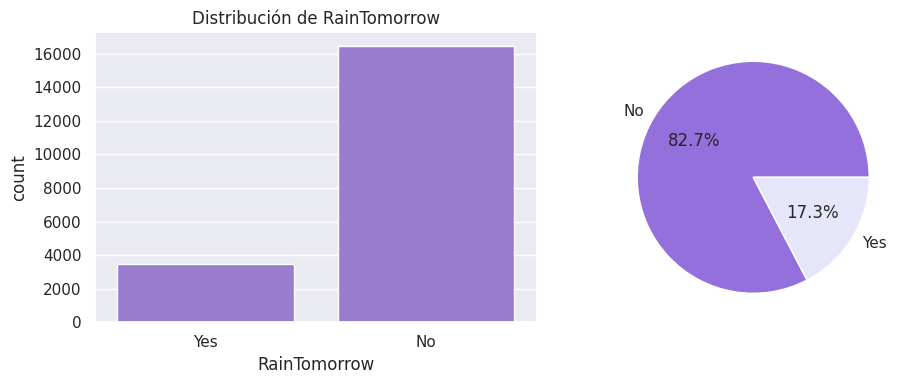

In [27]:
# Convertimos y_train en DataFrame y le damos un nombre de columna
y_train_df = pd.DataFrame(y_train, columns=['RainTomorrow'])

# Contamos las categorías en 'RainTomorrow'
valores = y_train_df['RainTomorrow'].value_counts()
indices = valores.index

plt.figure(figsize=(10, 4))

# Gráfico 1: Countplot de barras
plt.subplot(1, 2, 1)
ax = sns.countplot(x='RainTomorrow', data=y_train_df, color="mediumpurple")
plt.title('Distribución de RainTomorrow')

# Gráfico 2: Gráfico de torta
plt.subplot(1, 2, 2)
plt.pie(valores, labels=indices, autopct='%1.1f%%', colors=['mediumpurple', 'lavender'])

plt.tight_layout()
plt.show()

#### **¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?**

El gráfico muestra que el dataset está desbalanceado, mostrando una mayor cantidad de casos en los que no va a llover frente a aquellos en los que sí. Este análisis es clave para anticipar posibles problemas futuros, como el impacto de este desbalance en el rendimiento del modelo o qué métricas son convenientes elegir.

Si no se aplican técnicas de balanceo, el modelo podría inclinarse hacia predecir "No lluvia" con mayor frecuencia, lo que distorsionaría las métricas de rendimiento, como el accuracy, que podría ser alto sin reflejar realmente la calidad del modelo.

### **Matriz de correlación de variables**

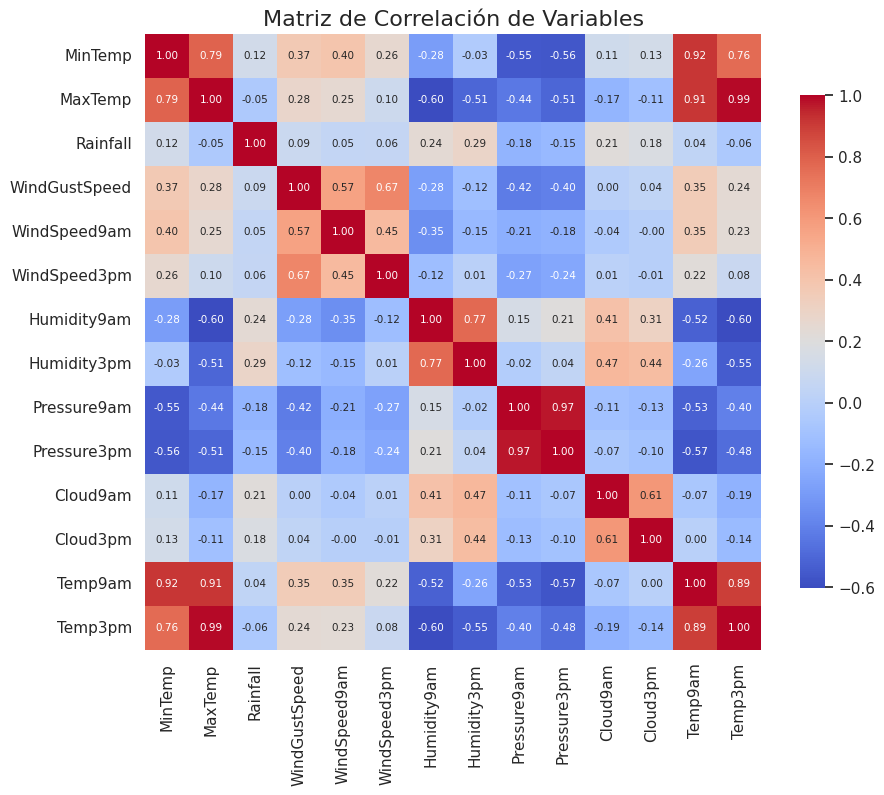

In [28]:
plt.figure(figsize=(10, 8))

sns.heatmap(X_train.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 7.5})

plt.title('Matriz de Correlación de Variables', fontsize=16)
plt.show()

A partir de la matriz de correlacion, se pueden hacer algunas observaciones:

* MinTemp y MaxTemp (0.79): Estas dos variables están fuertemente correlacionadas positivamente. Esto indica que las temperaturas mínima y máxima suelen aumentar y disminuir juntas en un día.

* MinTemp y Temp9am (0.92), MaxTemp y Temp9am (0.91): Las temperaturas a las 9 a.m. tienen una alta correlación con las temperaturas mínimas y máximas del día.

* WindGustSpeed y WindSpeed9am (0.57), WindGustSpeed y WindSpeed3pm (0.67): Existe una correlación positiva considerable entre la velocidad de las ráfagas de viento y las velocidades del viento registradas en la mañana y la tarde. Esto sugiere que los días con ráfagas de viento fuertes tienden a tener vientos más rápidos en ambos momentos del día.

* Humidity9am y Humidity3pm (0.77): Hay una fuerte correlación positiva entre los niveles de humedad a las 9 a.m. y a las 3 p.m. Esto indica que los días con alta (o baja) humedad en la mañana tienden a continuar con alta (o baja) humedad por la tarde.

* Pressure9am y Pressure3pm (0.97): La correlación alta entre la presión atmosférica a las 9 a.m. y a las 3 p.m. es esperada, ya que los cambios en la presión suelen ser graduales durante el día.

* Cloud9am y Cloud3pm (0.61): Muestra que el porcentaje de nubosidad en la mañana tiende a predecir razonablemente bien la cantidad de nubosidad en la tarde.

* Temp9am y Temp3pm (0.89): Las temperaturas a las 9 a.m. y a las 3 p.m. están fuertemente correlacionadas, lo que indica que los días más cálidos por la mañana tienden a ser también más cálidos por la tarde.

* RainToday y Rainfall (0.52): Aunque la correlación es moderada, tiene sentido que haya una relación entre la cantidad de lluvia acumulada y si llueve ese día o no. Sin embargo, no es una correlación perfecta, lo que puede deberse a que la variable "RainToday" es binaria (Sí/No).

* MinTemp y Pressure9am (-0.55): Hay una correlación negativa entre la temperatura mínima y la presión atmosférica en la mañana. Esto puede sugerir que cuando la presión es baja, las temperaturas tienden a ser más frías.
Algo similar sucede con MinTemp y Pressure3pm.

* MaxTemp y Humidity9am (-0.60): A medida que la temperatura máxima sube, la humedad en la mañana tiende a bajar.


### **Codificación de variables categóricas**


Primero, veremos cuales son las variables categóricas de nuestro dataset.

In [29]:
X_train.select_dtypes(include=['object']).columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

De estas, la columna 'Location', que indica la ciudad, será considerarse como una única ubicación en la confección del modelo.

Por otro lado, 'RainToday' es una variación dummy que indica si hoy llovió o no, así que la codificaremos como 1 para el caso afirmativo y 0 para el negativo.

In [30]:
#Codificación RainToday
X_train['RainToday'] = X_train['RainToday'].map({'Yes': 1,  'No':0})
X_test['RainToday'] = X_test['RainToday'].map({'Yes': 1,  'No':0})
X_val['RainToday'] = X_val['RainToday'].map({'Yes': 1,  'No':0})

Además, codificaremos de forma similar a la variable target, 'RainTomorrow'.

In [31]:
# Codificación de las variables objetivo (y_train, y_test, y_val)
y_train = np.where(y_train == 'Yes', 1, 0)
y_test = np.where(y_test == 'Yes', 1, 0)
y_val = np.where(y_val == 'Yes', 1, 0)

Para codificar las columnas categóricas restantes, podemos transformar cada categoría en una columna binaria, es decir, asigna un valor de 1 a la columna correspondiente cuando la categoría está presente en esa fila y 0 en las demás.

En particular, para la dirección del viento, podemos elegir entre 16, 8 o 4 direcciones, la cantidad de columnas resultantes dependerá de cuántas direcciones decidamos incluir: a mayor número de direcciones, más columnas obtendremos.

**16 Direcciones default**

In [32]:
print(X_train['WindGustDir'].unique())
print(len(X_train['WindGustDir'].unique()))

['NW' 'NNE' 'SE' 'WNW' 'W' 'S' 'SSW' 'NE' 'E' 'WSW' 'NNW' 'ENE' 'SW' 'ESE'
 'N' 'SSE']
16


In [33]:
def num_dir(df, n):
  """Recibe un dataframe y un numero de direcciones de viento
  y reemplaza en las columnas correspondientes a direcciones de viento
  segun sea el n"""
  data = df.copy(deep=True)
  cols = data.select_dtypes(include=['object']).columns
  if n == 4:
    data[cols] = data[cols].replace(['NW','NNE','NE','NNW'], 'N')
    data[cols] = data[cols].replace(['WNW','WSW'], 'W')
    data[cols] = data[cols].replace(['ENE','ESE'], 'E')
    data[cols] = data[cols].replace(['SW','SSW','SE','SSE'], 'S')
  elif n == 8:
    data[cols] = data[cols].replace(['NNE','NNW'], 'N')
    data[cols] = data[cols].replace(['WNW','WSW'], 'W')
    data[cols] = data[cols].replace(['ENE','ESE'], 'E')
    data[cols] = data[cols].replace(['SSW','SSE'], 'S')
  return data

In [34]:
def graf_comparacion_windDir(df, y, numeric_columns):
    """
    Compara el rendimiento de un modelo al usar diferentes niveles de agrupación
    de la dirección del viento (16, 8 y 4 categorías) basandose en los F1-Scores
    por clase.
    """
    x_16 = df.copy()
    x_8 = num_dir(df, 8)
    x_4 = num_dir(df, 4)

    datasets = {'16 direcciones': x_16, '8 direcciones': x_8, '4 direcciones': x_4}
    f1_results = []
    accuracy_results = []

    for key, X in datasets.items():
        # Dividir en conjunto de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # One-hot encoding para las columnas categóricas
        categorical_cols = X_train.select_dtypes(include=['object']).columns

        # Aplicar encoding
        X_train = pd.get_dummies(X_train, prefix_sep='_', dtype=int)
        X_test = pd.get_dummies(X_test, prefix_sep='_', dtype=int)

        # Escalar las columnas numéricas con RobustScaler
        scaler = RobustScaler()
        X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
        X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

        # Entrenar el modelo de Regresión Logística
        model = LogisticRegression(class_weight="balanced", solver='lbfgs', max_iter=360, random_state=42)
        model.fit(X_train, y_train.ravel())

        # Predicción y cálculo del F1-Score
        y_pred = model.predict(X_test)
        f1_per_class = f1_score(y_test, y_pred, average=None)
        accuracy = accuracy_score(y_test, y_pred)

        f1_results.append({
            'Direcciones': key,
            'F1-Score (Por Clase)': f1_per_class,
            'Clases': model.classes_
        })

        accuracy_results.append({
            'Direcciones': key,
            'Accuracy': accuracy
        })

    # Gráfico de F1-Score por clase
    plt.figure(figsize=(12, 6))
    width = 0.25  # Ancho de las barras
    x = np.arange(len(f1_results[0]['Clases']))  # Posiciones para las clases

    for i, r in enumerate(f1_results):
        plt.bar(x + i * width, r['F1-Score (Por Clase)'], width=width, label=f"{r['Direcciones']}", alpha=0.8)

    plt.xlabel('Clases')
    plt.ylabel('F1-Score')
    plt.title('Comparación de F1-Score por Clase para diferentes agrupaciones')
    plt.xticks(x, f1_results[0]['Clases'], rotation=45)  # Etiquetas de clases
    plt.ylim(0, 1)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # Gráfico de Accuracy por configuración
    plt.figure(figsize=(8, 6))
    directions = [r['Direcciones'] for r in accuracy_results]
    accuracies = [r['Accuracy'] for r in accuracy_results]

    plt.bar(directions, accuracies, color=['skyblue', 'lightgreen', 'salmon'], alpha=0.8)
    plt.xlabel('Número de categorías de dirección del viento')
    plt.ylabel('Accuracy')
    plt.title('Comparación de Accuracy para diferentes agrupaciones')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


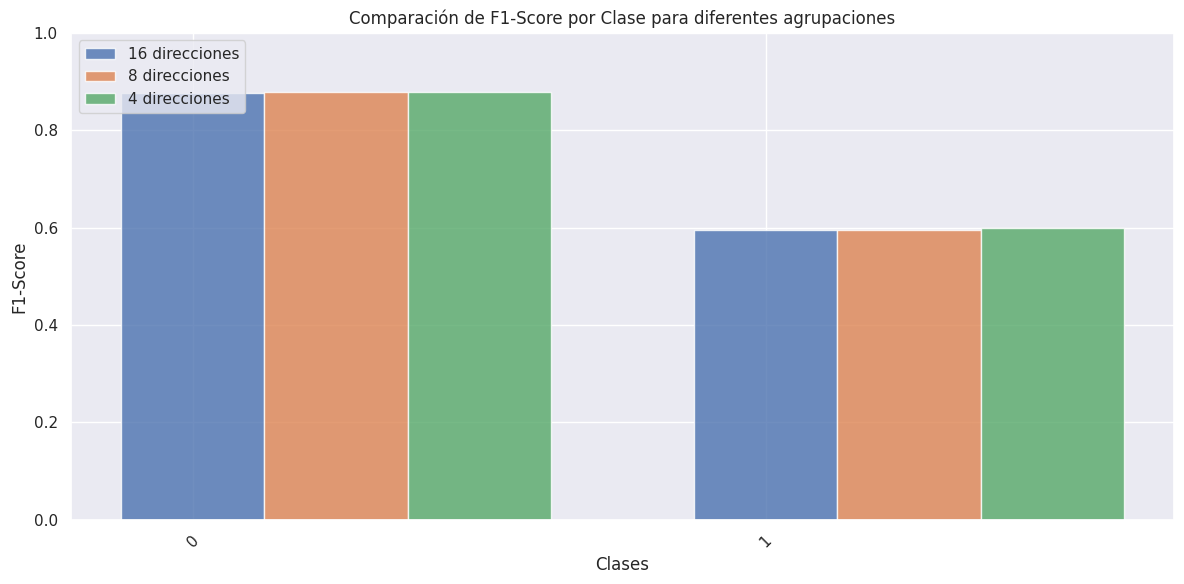

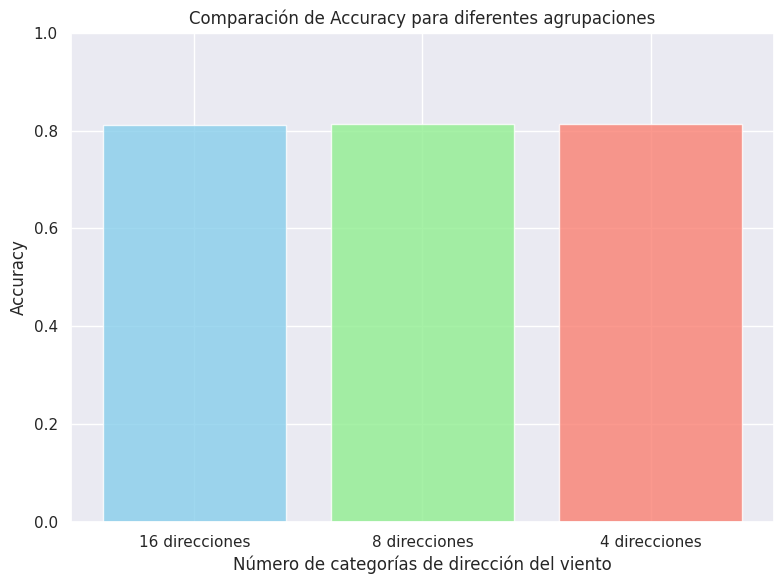

In [38]:
graf_comparacion_windDir(X_train, y_train, numeric_columns)

Vamos a trabajar con 4 direcciones de viento ya que vemos que con 8 y 16  direcciones, F1-score da lo mismo. Ademas, probamos y las otras metricas del modelo dieron peor.

In [39]:
#Modificamos las direcciones de viento para cada conjunto
#para tener 4 direcciones en vez de 16
X_train = num_dir(X_train, 4)
X_val = num_dir(X_val, 4)
X_test = num_dir(X_test, 4)

In [40]:
#Utilizamos el metodo get_dummies para hacer un one hot encoding estandar
X_train = pd.get_dummies(X_train, prefix_sep='_', dtype=int)
X_val = pd.get_dummies(X_val, prefix_sep='_', dtype=int)
X_test = pd.get_dummies(X_test, prefix_sep='_', dtype=int)
len(X_train.columns)

27

In [41]:
#Chequeamos la forma de los conjuntos
X_train.shape, X_test.shape, X_val.shape

((19889, 27), (4262, 27), (4263, 27))

In [42]:
#Chequeamos la forma del conjunto y
y_train.shape, y_test.shape, y_val.shape

((19889, 1), (4262, 1), (4263, 1))

### **Estandarización/escalado de datos**

Como mencionamos anteriormente, hay una alta presencia de outliers por lo que para escalar este dataset necesitaremos seleccionar un método robusto. En nuestro caso, usaremos  RobustScaler.  Este scaler utiliza la mediana y el rango intercuartílico (IQR) para escalar los datos, es decir, se centra en el 50% de los datos, lo que significa que los outliers tienen un efecto mínimo.

In [43]:
# Creamos el escalador
scaler = RobustScaler()

# Aplicamos el escalado solo a las columnas numéricas
X_train_scaled = X_train.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_val_scaled = X_val.copy()
X_val_scaled[numeric_columns] = scaler.transform(X_val[numeric_columns])

## **2. Regresión Logística**

In [44]:
# Entrenar el modelo de regresión logística
model = LogisticRegression(class_weight="balanced", #ajusta automaticamente los pesos de las clases
                           solver = 'lbfgs',
                           max_iter=360, #Menor a esto no converge!
                           random_state=42)
model.fit(X_train_scaled, y_train.ravel())

# Predicciones
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

### **Métricas**

In [45]:
# Evaluación detallada del modelo para ambas clases
report = classification_report(y_test, y_pred, target_names=["Clase Negativa", "Clase Positiva"], digits=4)

print(report)

                precision    recall  f1-score   support

Clase Negativa     0.9531    0.8242    0.8840      3504
Clase Positiva     0.5000    0.8127    0.6191       758

      accuracy                         0.8221      4262
     macro avg     0.7266    0.8184    0.7515      4262
  weighted avg     0.8725    0.8221    0.8369      4262



**Clase Negativa:**

Precisión: 0.95 — Esto significa que el 95% de las predicciones de la clase negativa son correctas, lo cual es un valor bastante alto. El modelo tiene pocos falsos positivos en la clase negativa.  

Recall: 0.82 — El modelo identifica correctamente el 82% de los casos negativos. Esto sugiere que el modelo ha reducido la cantidad de falsos negativos para la clase negativa, capturando un mayor número de ejemplos verdaderos.  

F1-score: 0.88 — El F1-score indica un buen equilibrio entre precisión y recall en la clase negativa.   

---
**Clase Positiva:**

Precisión: 0.50 — Esto significa que el 50% de las predicciones positivas son correctas. Este resultado es moderado, lo que implica que el modelo produce una cantidad considerable de falsos positivos al predecir la clase positiva.  

Recall: 0.81 — El recall es bastante alto, lo cual indica que el modelo es capaz de identificar la mayoría de los casos positivos. Esto es importante en situaciones donde se desea detectar el máximo número posible de verdaderos positivos, aunque se produzcan algunos falsos positivos.

F1-score: 0.62 — El F1-score muestra que el buen resultado de recall en la clase positiva está compensando la precisión moderada, logrando un mejor equilibrio entre ambas.

---
**Métricas Globales**

Accuracy (Exactitud): 0.82 — Este valor indica que el 82% de todas las predicciones son correctas.

Macro avg: 0.72 (Precisión), 0.82 (Recall), 0.75 (F1-score) — Esto muestra un balance entre ambas clases, aunque con una leve desventaja en la precisión de la clase positiva.

Weighted avg: 0.87 (Precisión), 0.82 (Recall), 0.84 (F1-score) — Al estar ponderado según el soporte de cada clase, indica que el modelo en general está haciendo un buen trabajo al manejar el desbalance de clases, dando más peso a la clase negativa, que es la mayoritaria.


---


**Conclusión**

Se logró una buena precisión y recall en la clase negativa (mayoritaria) y un recall aceptable en la clase positiva, aunque la precisión en esta última es moderada.

### **Matriz de Confusión**

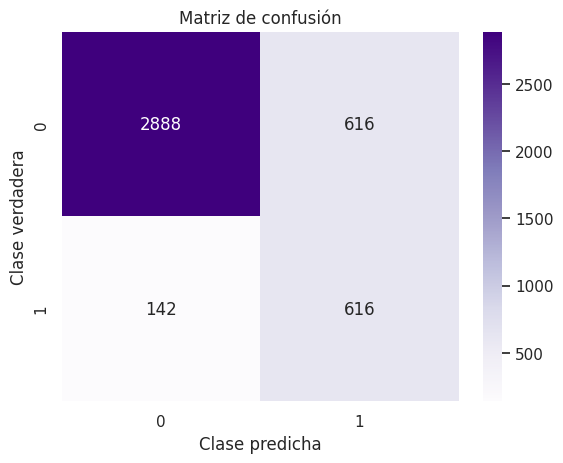

In [46]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión")
plt.show()

A continuación se detallan las métricas clave basadas en los valores de la matriz de confusión:

**Verdaderos Negativos (TN):** 2888 — Casos negativos correctamente clasificados.

**Falsos Positivos (FP):** 616 — Casos negativos clasificados incorrectamente como positivos.

**Falsos Negativos (FN):** 142 — Casos positivos clasificados incorrectamente como negativos.

**Verdaderos Positivos (TP):** 616 — Casos positivos correctamente clasificados.

La matriz de confusión y las métricas calculadas muestran que el modelo logra un buen balance en cuanto a la detección de clases, aunque presenta un número considerable de falsos positivos. Esto puede ser aceptable dependiendo del contexto, pero si la precisión en la clase positiva es crucial, podrían aplicarse ajustes adicionales (como la optimización del umbral) para mejorar este aspecto.



### **Curva ROC**

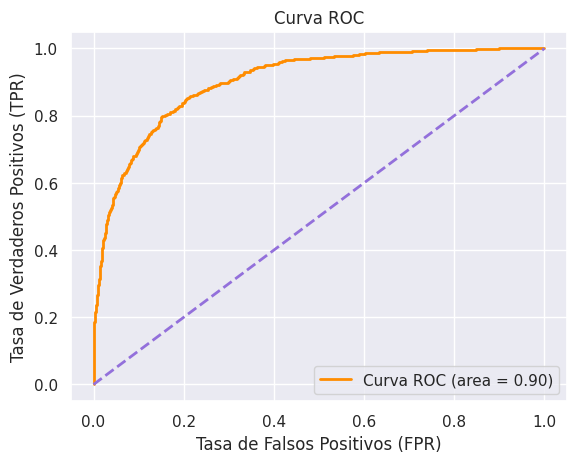

In [47]:
# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Curva ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="mediumpurple", lw=2, linestyle="--")
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Notamos una AUC de 0.90 lo que sugiere que, en promedio, el modelo puede distinguir entre las clases positiva y negativa un 90% de las veces. Esto sugiere que el modelo tiene un buen rendimiento, aunque hay espacio para mejoras, por ejemplo, si logramos que la AUC sea más cercana a 1, es decir, mas cerca de tener un clasificaador perfecto.

### **Ajustar el Umbral de Decisión**

In [48]:
# Obtener probabilidades de predicción del modelo
y_prob = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Calcular F1-scores para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores.argmax()]

print(f"Mejor umbral para F1-score: {best_threshold}")

Mejor umbral para F1-score: 2.3701050182997913e-126


                precision    recall  f1-score   support

Clase Negativa      0.916     0.933     0.925      3504
Clase Positiva      0.662     0.606     0.633       758

      accuracy                          0.875      4262
     macro avg      0.789     0.769     0.779      4262
  weighted avg      0.871     0.875     0.873      4262



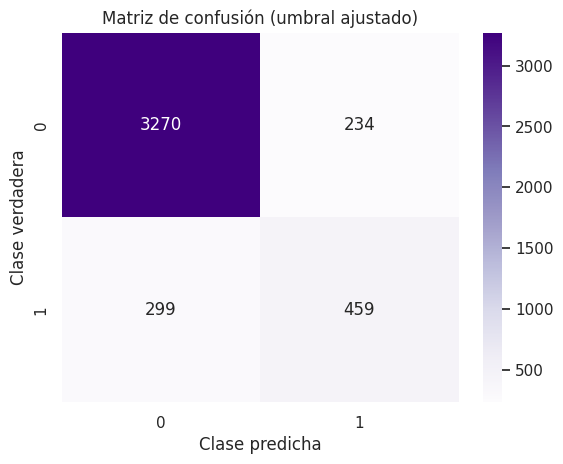

In [49]:
# Realizar las predicciones con el umbral personalizado
y_pred_custom = (y_prob >= best_threshold).astype(int)

# Evaluación detallada del modelo para ambas clases
report = classification_report(y_test, y_pred_custom, target_names=["Clase Negativa", "Clase Positiva"], digits = 3)

print(report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión (umbral ajustado)")
plt.show()

Luego de ajustar el umbral de decisión a un valor extremadamente bajo (2.3701050182997913e-126), se ha logrado una mejora significativa en las métricas del modelo. A continuación, se detallan las conclusiones principales:

**Mejora en el Balance General:**

La precisión general (accuracy) del modelo alcanzó el 87%, indicando que el modelo ahora clasifica correctamente un mayor porcentaje de casos, independientemente de la clase.
Los promedios macro y weighted reflejan un valor de 0.79 y 0.87 respectivamente en F1-score, lo que sugiere un equilibrio más consistente en el rendimiento entre las dos clases, teniendo la clase positiva con una mejor precisión.

---
**Reducción de Falsos Positivos:**

Gracias a este ajuste del umbral, el modelo ha logrado reducir la cantidad de falsos positivos. La precisión de la clase positiva (0.66) muestra que el modelo tiene ahora un mayor control sobre las predicciones positivas, reduciendo la cantidad de casos negativos que se clasifican incorrectamente como positivos.

Esto es particularmente importante si los falsos positivos tienen un impacto negativo considerable en el contexto de aplicación, como en el uso agropecuario, ya que el nuevo umbral permite que el modelo sea más conservador en sus predicciones de la clase positiva.

---
**Aumento en Falsos Negativos:**

A pesar del incremento en los falsos negativos, el recall de la clase positiva se mantiene en 0.61, mostrando que el modelo todavía logra identificar una buena parte de los casos positivos. La elección de este umbral específico parece haber encontrado un punto de equilibrio donde la reducción de falsos positivos es más significativa que el aumento de falsos negativos.

### **Conclusiones**

Este ajuste ha mejorado la robustez y confiabilidad del modelo, minimizando las predicciones incorrectas en general. La mejora en la precisión, junto con el mantenimiento de un recall razonable, sugiere que el modelo ahora logra un balance adecuado entre precisión y exhaustividad.

## **3. Modelo base**

Nuestro modelo base se basa en predecir la variable target 'RainTomorrow' a partir de la **moda** de esta columna.
Este modelo base nos sirve como una referencia para comparar con modelos de clasificacion y ver si realmente mejoramos las metricas del primero.

In [50]:
#Calculamos la moda del conjunto y de entrenamiento
st.mode(y_train[:,0])[0]

0

Como la moda es 0, significa que nuestra prediccion será que nunca llueve

In [51]:
#Creo matriz de confusion vacia
#Tener en cuenta que no tendremos valores en la columna derecha
#ya que nuestro modelo base nunca predice la clase 1
matriz_conf = np.int64(np.zeros((2,2)))
matriz_conf

array([[0, 0],
       [0, 0]])

Calculamos la cantidad de predicciones de cada clase. Al ser nuestro valor predicho 0 (nunca llueve), solo debemos calcular la cantidad de 0s y 1s que tengo para saber la cantidad de verdaderos negativos (TN) y falsos negativos(FN) respectivamente.

 FP y TP son iguales a 0 por lo dicho anteriormente.

In [52]:
total = y_test.shape[0]
cant_clase0 = (y_test[:,0] == 0).sum()
cant_clase1 = total - cant_clase0
tp, fn = cant_clase0, cant_clase1

In [53]:
#Almacenamos los TN y los FN en la matriz de confusión y estaria terminada
matriz_conf[0,0] = cant_clase0
matriz_conf[1,0] = cant_clase1
matriz_conf

array([[3504,    0],
       [ 758,    0]])

### **Métricas**

In [54]:
# Evaluación detallada del modelo para ambas clases
y_pred = np.int64(np.zeros((y_test.shape[0])))
report = classification_report(y_test, y_pred, target_names=["Clase Negativa", "Clase Positiva"], zero_division=True, digits = 3)

print(report)

                precision    recall  f1-score   support

Clase Negativa      0.822     1.000     0.902      3504
Clase Positiva      1.000     0.000     0.000       758

      accuracy                          0.822      4262
     macro avg      0.911     0.500     0.451      4262
  weighted avg      0.854     0.822     0.742      4262




Con base en las métricas obtenidas, podemos observar que el modelo basado en la moda es menos efectivo en comparación con el modelo de regresión logística, lo cual era esperado debido a la simplicidad del enfoque.

**Análisis de las métricas:**


*Accuracy*: El modelo predice correctamente el 82% de las instancias en total, lo cual parece ser un buen porcentaje a simple vista. Sin embargo, este alto valor de exactitud se debe principalmente a que la clase "No Llueve" es mucho más frecuente y el modelo tiende a predecir siempre esta clase.

*Precisión*: La precisión para la clase "No Llueve" es de 0.82, lo que indica que el 82% de las veces que el modelo predice "No Llueve", está en lo correcto. Para la clase "Llueve", la precisión es de 1.0, lo cual indica que no hay falsos positivos para esta clase.

*Recall*: El modelo tiene un recall de 1.0 para "No Llueve", lo que significa que está detectando todos los casos en los que realmente no llueve. Para la clase "Llueve", sin embargo, el recall es 0.0, lo que significa que no detecta ninguno de los casos de lluvia. Esto refleja una falta total de sensibilidad hacia la clase minoritaria, "Llueve".

*F1 Score*: El F1 para la clase "No Llueve" es de 0.90, lo que indica un equilibrio adecuado entre precisión y recall para esta clase. Sin embargo, para la clase "Llueve", el F1 Score es 0.0 debido a la ausencia de predicciones correctas, confirmando que el modelo no tiene capacidad para identificar estos casos.


Este modelo está sesgado hacia la clase "No Llueve", lo cual genera métricas muy desequilibradas. Aunque la accuracy es alta, el modelo no es útil en la práctica para detectar la clase "Llueve", ya que, como dijimos antes al ser la moda 0, la prediccion será que nunca llueve.



### **Matriz de Confusión**

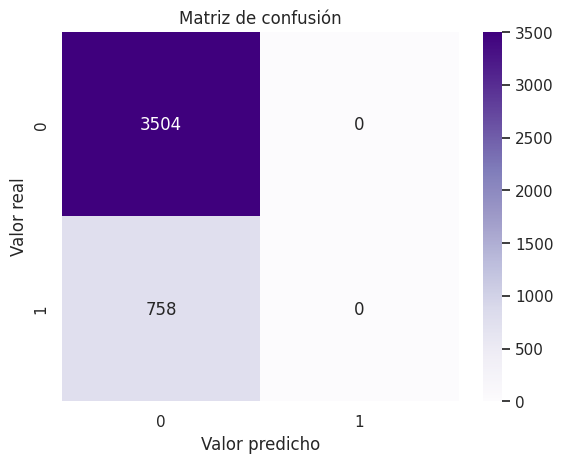

In [55]:
# Visualizamos la matriz de confusión
sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()

 Observando la matriz, se ve que el modelo ha predicho correctamente 3504 casos de la clase 0 (No llueve). Sin embargo, cuando se trata de la clase 1 (Llueve), vemos que no ha acertado ningún caso: todos los 758 ejemplos de la clase 1 han sido clasificados incorrectamente como clase 0.

Esto implica que el modelo tiene un sesgo hacia la clase 0, lo que puede haber llevado al modelo a generalizar en exceso y predecir principalmente esta clase. En resumen, el modelo es útil para identificar la clase 0, pero carece de capacidad para reconocer casos de la clase 1, como deciamos anteriormente.

### **Curva ROC**

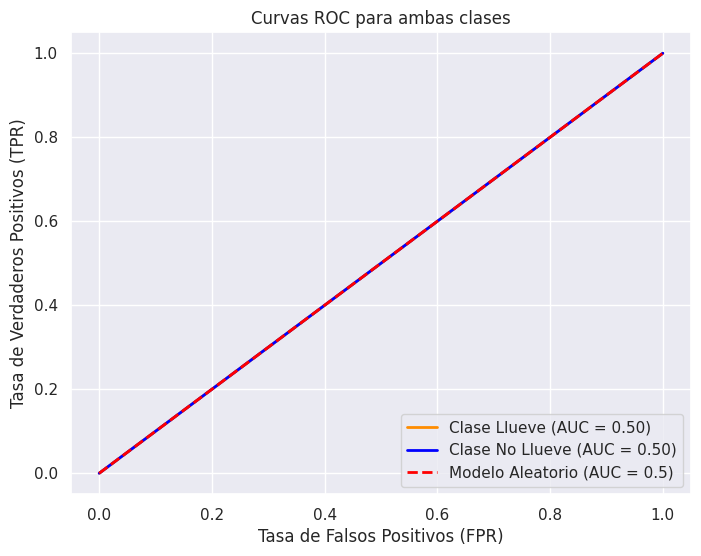

In [56]:
# Calcular la curva ROC y AUC para la clase Llueve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calcular la curva ROC y AUC para la clase No Llueve (usando la predicción inversa 1 - y_pred)
fpr_no_llueve, tpr_no_llueve, _ = roc_curve(y_test, 1 - np.array(y_pred))
roc_auc_no_llueve = auc(fpr_no_llueve, tpr_no_llueve)

# Graficar ambas curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Clase Llueve (AUC = {roc_auc:.2f})")
plt.plot(fpr_no_llueve, tpr_no_llueve, color="blue", lw=2, label=f"Clase No Llueve (AUC = {roc_auc_no_llueve:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--", label="Modelo Aleatorio (AUC = 0.5)")

# Personalizar la gráfica
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title("Curvas ROC para ambas clases")
plt.legend(loc="lower right")
plt.show()

 La línea diagonal que cruza desde (0,0) hasta (1,1) representa un modelo que no es mejor que una elección aleatoria. Ambos AUC (Área Bajo la Curva) tienen un valor de 0.50, lo que indica que el modelo actual no tiene capacidad predictiva para diferenciar entre las dos clases. Esto sugiere que las características no están proporcionando la información necesaria para predecir con precisión la ocurrencia de lluvia, como es el caso para este modelo.

## **4. Optimización de hiperparámetros**

### **4.1 Validación cruzada k-folds**

No corresponde ya que tenemos un conjunto de validación que vamos a utilizar para optimizar lo hiperparametros con optuna.

### **4.2 Optuna**

In [57]:
# Instalamos optuna
!pip install --quiet optuna

In [58]:
# Importamos librerias necesarias
import optuna
import shap

In [59]:
# Definimos función para entrenar y evaluar un modelo con hiperparámetros dados
def train_evaluate_model(params, X_train, y_train, X_val, y_val):
    y_train = y_train.ravel()
    y_val = y_val.ravel()
    model = LogisticRegression(class_weight="balanced",**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

In [60]:
# Definimos funcion objetivo para usar optuna
def objective(trial):

    # Sugerir una combinación de solver y penalty en un solo paso para evitar espacios dinámicos
    solver_penalty = trial.suggest_categorical(
        'solver_penalty',
        ['lbfgs-l2', 'liblinear-l1', 'liblinear-l2', 'saga-l1', 'saga-l2']
    )

    # Dividir el valor de solver_penalty en solver y penalty
    solver, penalty = solver_penalty.split('-')

    max_iter = trial.suggest_int('max_iter', 400, 2000)

    C = trial.suggest_float('C', 1e-6, 1e6, log=True)
    tol =  trial.suggest_float('tol', 1e-5, 1e-3, log=True)

    # Definir los hiperparámetros a optimizar
    params = {
        'solver': solver,
        'penalty': penalty,
        'max_iter': max_iter,
        'C': C,
        'tol': tol
    }

    f1_score = train_evaluate_model(params, X_train_scaled, y_train, X_val_scaled, y_val)
    return f1_score

Creamos un estudio con optuna para optimizar hiperparametros maximizando la metrica f1-score. # Dado que los resultados se estabilizaron rápidamente, con mejoras mínimas después de 50 trials, limitamos el número de trials a 50 para evitar el uso innecesario de recursos computacionales sin perder efectividad en la optimización.

In [61]:
study = optuna.create_study(direction='maximize', study_name = 'HP tuning logistic regression')
study.optimize(objective, n_trials=50)

[I 2024-11-16 01:31:04,523] A new study created in memory with name: HP tuning logistic regression
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-11-16 01:31:12,196] Trial 0 finished with value: 0.5755732335049134 and parameters: {'solver_penalty': 'saga-l2', 'max_iter': 553, 'C': 78.20132674924066, 'tol': 0.0006029285944528932}. Best is trial 0 with value: 0.5755732335049134.
[I 2024-11-16 01:31:12,580] Trial 1 finished with value: 0.6143001007049346 and parameters: {'solver_penalty': 'liblinear-l1', 'max_iter': 509, 'C': 8322.195407143468, 'tol': 0.00031287654728557414}. Best is trial 1 with value: 0.6143001007049346.
[I 2024-11-16 01:31:12,654] Trial 2 finished with value: 0.5101088646967341 and parameters: {'solver_penalty': 'liblinear-l2', 'max_iter': 1505, 'C': 4.523434602542778e-06, 'tol': 1.1029203318225609e-05}. Best is trial 1 with value: 0.6

In [62]:
# Obtenemos los mejores hiperparametros y creamos el mejor modelo con los mismos
best_optuna_params = study.best_params
# Dividir el valor de solver_penalty en solver y penalty
solver, penalty = best_optuna_params['solver_penalty'].split('-')

#Agrego solver y penalty por separado y elimino la clave "solver-penalty" que no sirve para el modelo
best_optuna_params['solver'] = solver
best_optuna_params['penalty'] = penalty
best_optuna_params.pop('solver_penalty')
best_optuna_model = LogisticRegression(class_weight="balanced",**best_optuna_params, random_state=42)

# Entrenamos el modelo obtenido
best_optuna_model.fit(X_train_scaled, y_train)

# Predecimos con el conjunto de entrenamiento
y_pred = best_optuna_model.predict(X_test_scaled)

# Calculamos f1-score para ambas clases
optuna_f1_score = f1_score(y_test, y_pred, average = None)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mostramos el mejor resultado obtenido para la metrica f1-score

In [63]:
print("f1-score clase 0: ", optuna_f1_score[0])
print("f1-score clase 1: ", optuna_f1_score[1])

f1-score clase 0:  0.8835501147666411
f1-score clase 1:  0.6173956762192057


Mostramos los mejores parametros para el modelo

In [64]:
best_optuna_params

{'max_iter': 1811,
 'C': 1.705432492512686,
 'tol': 2.6193310485296173e-05,
 'solver': 'liblinear',
 'penalty': 'l1'}

### **Conclusión**

**Comparación de modelos:**

* **Modelo manual:** El modelo con configuración manual alcanzó un F1-score de **0.619**.
* **Ajuste de umbral:** Al ajustar el umbral de decisión, se logró un F1-score de **0.633**, lo que representa una mejora significativa sobre el modelo manual.
* **Modelo con Optuna:** El modelo optimizado con Optuna alcanzó un F1-score de **0.617**, muy similar al del modelo manual. Esto indica que los hiperparámetros predeterminados ya estaban cerca de los óptimos, y la optimización con Optuna no aportó mejoras sustanciales.

**Limitación del modelo de regresión logística en Sklearn:**

* Es importante destacar que el modelo de regresión logística de Scikit-learn tiene un umbral predeterminado de 0.5 fijo para la toma de decisiones. Dado que Optuna optimiza los hiperparámetros pero no puede modificar este umbral, es comprensible que el ajuste de umbral haya superado al modelo optimizado por Optuna.

En resumen, el modelo manual con ajuste de umbral resulta ser el enfoque más efectivo hasta ahora para este problema, logrando un mejor F1-score (**0.633**) en comparación con el modelo optimizado con Optuna (**0.617**). Esto indica que, en este caso, la optimización de los hiperparámetros con Optuna no ofreció una mejora significativa. Esto se debe a que Optuna no puede optimizar el umbral de decisión, que es un factor clave para mejorar el rendimiento en problemas como este, donde el balance entre precisión y recall tiene un impacto importante en la métrica F1-score.

## **5. Explicabilidad**

## Interpretabilidad **global**

In [65]:
# Inicializar SHAP explainer para el modelo
explainer = shap.Explainer(best_optuna_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

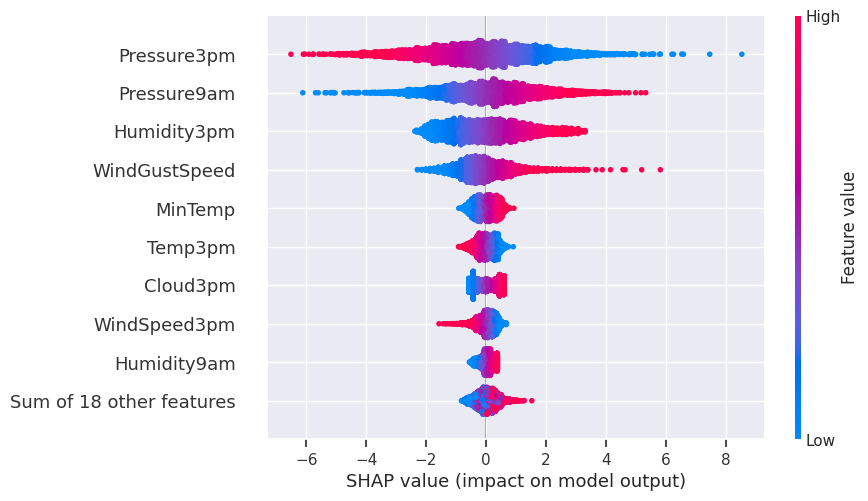

In [66]:
shap.plots.beeswarm(shap_values)

El gráfico de dispersión muestra que Pressure3pm tiene el mayor impacto global en el modelo, con una clara distribución bimodal. Los valores altos de presión (en rojo) tienden a tener un impacto positivo, mientras que los valores bajos (en azul) tienen un impacto negativo. Pressure9am y Humidity3pm siguen en importancia, también con patrones claros de impacto. Las variables relacionadas con nubes y temperatura tienen los impactos más bajos a nivel global.

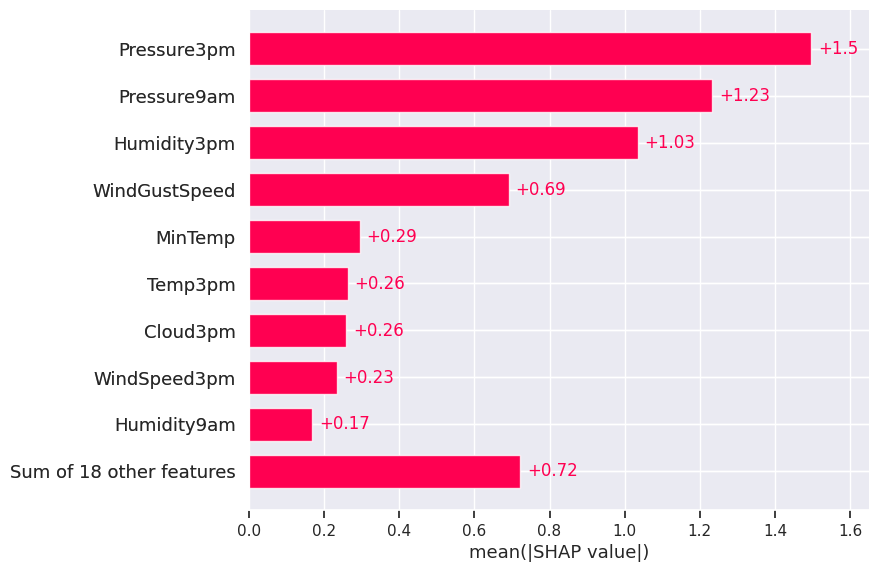

In [67]:
shap.plots.bar(shap_values)

Esta visualización confirma cuantitativamente lo observado en el beeswarm, mostrando que el conjunto de las 54 características restantes tiene un impacto medio absoluto de (0.72). El mayor impacto lo tiene  Pressure3pm (1.5), sequido de Pressure9am (1.23) y Humidity3pm (1.03). Las variables con menor impacto medio absoluto son WindGustSpeed (0.69), MinTemp (0.29), Temp3pm (0.26), Cloud9am (0.26) y WindSpeed3pm (0.23), lo que sugiere que estas variables son menos cruciales para las predicciones del modelo a nivel global.

## Interpretabilidad **local**

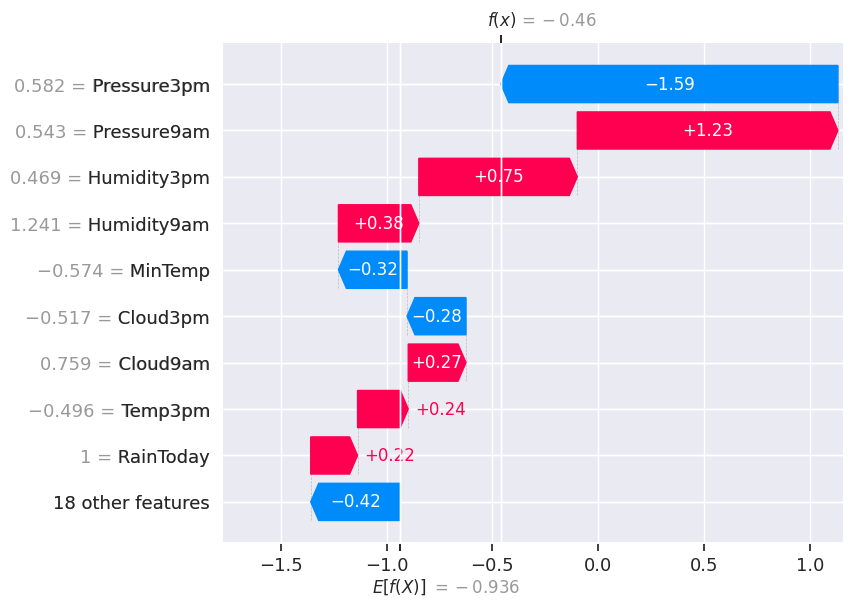

In [68]:
shap.waterfall_plot(shap_values[0])

Para esta predicción específica, el modelo comenzó con un valor base de -0.46. Pressure3pm tuvo el mayor impacto local (-1.59), seguido por Pressure9am (+1.23) y Humidity3pm (+0.75). Es interesante notar que aunque Pressure3pm y Pressure9am son mediciones similares, tuvieron efectos opuestos en esta predicción particular. El impacto acumulativo de todas las características llevó a un valor final de predicción de E[f(x)] = -0.936.

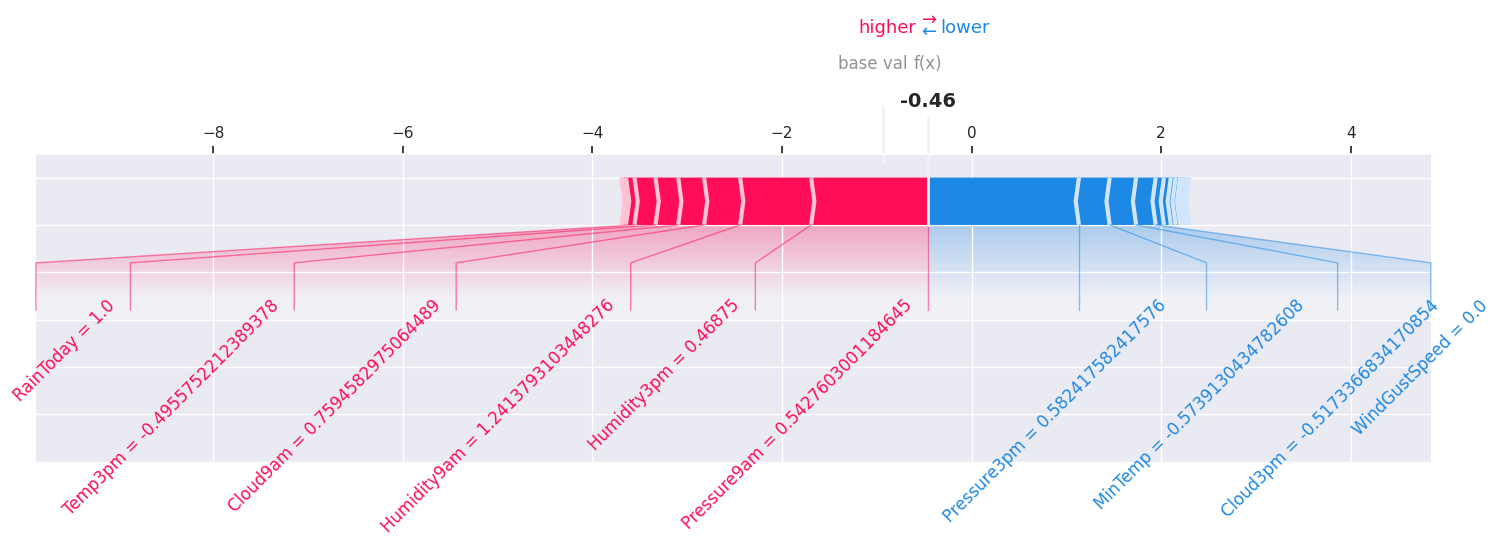

In [69]:
shap.force_plot(shap_values.base_values[0], shap_values.values[0], X_test_scaled.iloc[0, :], matplotlib=True, figsize=(18, 4), text_rotation=45)

Esta visualización representa el impacto de las características para un caso específico, con un valor base de -0.46. Las características en rojo empujan la predicción hacia valores más altos, mientras que las azules hacia valores más bajos. Pressure3pm tuvo la mayor contribución negativa, seguida por variables como MinTemp y Cloud3pm. Por otro lado, Pressure9am y Humidity3pm mostraron las contribuciones positivas más significativas. Es interesante notar que las variables relacionadas con la presión (3pm y 9am) tienen efectos opuestos, lo que podría indicar que los cambios en la presión durante el día son más relevantes que los valores absolutos.

# Conclusiones

La presión atmosférica y la humedad son los predictores más importantes tanto a nivel global como local, con Pressure3pm mostrando consistentemente el mayor impacto tanto en análisis globales como locales, aunque la dirección de este impacto puede variar.

El análisis local revela interacciones complejas entre variables relacionadas. Por ejemplo, las mediciones de presión en diferentes momentos del día (9am vs 3pm) pueden tener efectos contrapuestos en la predicción final.

Existe una coherencia clara entre las visualizaciones locales (force plot y waterfall), donde ambas muestran patrones similares de contribución de variables, aunque presentadas de manera diferente.

Las variables con menor importancia global pueden aún tener impactos locales significativos en casos específicos, lo que destaca la importancia de no descartar variables basándose únicamente en métricas globales.

El modelo muestra comportamientos no lineales importantes, especialmente en las variables de presión y humedad, como se evidencia en las distribuciones bimodales del gráfico beeswarm y se confirma en los análisis locales.

La interpretación combinada de métricas globales y locales proporciona una comprensión más completa del comportamiento del modelo: mientras que las métricas globales identifican las variables generalmente más influyentes, las locales revelan cómo estas influencias pueden variar significativamente en casos específicos.

## **6. AutoML**

Para resolver este punto usaremos la libreria de pycaret. Para ello, primero la importaremos:

In [70]:
!pip install pycaret

In [84]:
import pycaret
from pycaret.classification import *
from pycaret.classification import predict_model

Al principio del trabajo descargamos el dataset y creamos una copia de este con la que trabajamos durante todo el trabajo. Ahora nos valdremos de ese dataset original y crearemos una nueva copia del mismo.

In [72]:
df_aml = data.copy()
df_aml.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Seleccionaremos las 10 ciudades que utilizamos al principio y removeremos los registros de la columna con la variable objetivo que sean nulos.

In [73]:
df_aml = df_aml[df_aml['Location'].isin(ciudades_seleccionadas)]
df_aml = df_aml.dropna(subset=['RainTomorrow'])

Luego de esto, podemos correr los elementos de pycaret para poder comparar entre los modelos y, asi, saber cual arroja mejores metricas.

Le pasaremos df_aml como datos y realizaremos un setup. Esta función de setup inicializa el entorno de entrenamiento y crea el canal de transformación. La función Setup debe invocarse antes de ejecutar cualquier otra función. Toma dos parámetros obligatorios: data (Conjunto de datos) y target (nombre de la columna de objetvo de los datos).

In [74]:
train_data = df_aml

clf = setup(data=train_data, target='RainTomorrow', session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(28414, 23)"
5,Transformed data shape,"(28414, 77)"
6,Transformed train set shape,"(19889, 77)"
7,Transformed test set shape,"(8525, 77)"
8,Numeric features,16
9,Categorical features,6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8847,0.8994,0.8847,0.8766,0.8768,0.5485,0.5597,8.0960
et,Extra Trees Classifier,0.8741,0.8879,0.8741,0.8636,0.8584,0.4669,0.4956,3.8710
knn,K Neighbors Classifier,0.8728,0.8306,0.8728,0.8621,0.8635,0.4986,0.5096,1.7470
ridge,Ridge Classifier,0.8720,0.8771,0.8720,0.8604,0.8577,0.4667,0.4903,0.4580
lda,Linear Discriminant Analysis,0.8699,0.8745,0.8699,0.8603,0.8628,0.5019,0.5082,0.8330
rf,Random Forest Classifier,0.8655,0.8716,0.8655,0.8520,0.8477,0.4247,0.4542,5.2310
lightgbm,Light Gradient Boosting Machine,0.8594,0.7443,0.8594,0.8460,0.8487,0.4432,0.4539,2.4900
xgboost,Extreme Gradient Boosting,0.8578,0.7597,0.8578,0.8445,0.8475,0.4398,0.4496,1.3090
gbc,Gradient Boosting Classifier,0.8571,0.7322,0.8571,0.8425,0.8451,0.4274,0.4399,6.7550
ada,Ada Boost Classifier,0.8534,0.7604,0.8534,0.8384,0.8417,0.4161,0.4271,2.1830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Sabemos que el AutoML realiza automáticamente el preprocesamiento de los datos. Aquí vemos que para procesar los datos, se hizo una transformación que expandió el conjunto a 77 columnas, lo que probablemente se deba a la codificación de variables categóricas. Se observó que casi el 59% de las filas tienen valores faltantes, por lo que se aplicó una imputación simple, utilizando la media para los valores numéricos y la moda para los categóricos. La transformación incluyó la codificación de variables categóricas mediante one-hot encoding, permitiendo hasta 25 categorías por variable.

Ademas, se prueban y comparan modelos de clasificación y los resultados muestran métricas clave como Accuracy (precisión), AUC (Área Bajo la Curva), Recall, Precisión y F1 Score. Algunos de los modelos con mejores métricas son:

1. **Logistic Regression**
   
2. **Extra Trees Classifier**

3. **K-Neighbors Classifier**

La precisión general de los mejores modelos es alta, lo que indica que el conjunto de datos y las características seleccionadas permiten hacer buenas predicciones sobre la variable objetivo. El recall y precisión en estos modelos también es elevada, lo cual es importante para asegurar que las predicciones de lluvia sean confiables.

Este análisis indica que AutoML permiten obtener modelos de clasificación que predicen la lluvia de manera precisa.

In [85]:
# Predicciones en el conjunto de datos de prueba
predictions = predict_model(best_model)

prediction_label_col = predictions.columns[predictions.columns.str.startswith('prediction_label')][0]

# Calcula el F1-score para cada clase
f1_scores = f1_score(predictions['RainTomorrow'], predictions[prediction_label_col], average=None)

# Imprime los resultados
class_labels = best_model.classes_
for i, label in enumerate(class_labels):
    print(f"F1-Score para la clase '{label}': {f1_scores[i]}")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8815,0.8924,0.8815,0.8727,0.8739,0.5387,0.5481


F1-Score para la clase '0': 0.9302678818006076
F1-Score para la clase '1': 0.6063912704598597


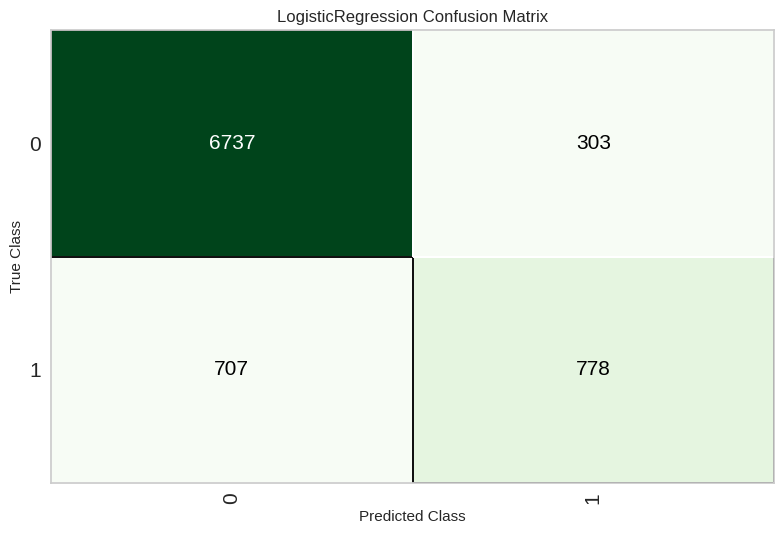

In [78]:
plot_model(best_model, plot = 'confusion_matrix')

Lo que notamos de esta matriz de confusion es:
Precisión en la clase 0: Muy alta, ya que 6737 de las muestras fueron correctamente clasificadas como 0.
Precisión en la clase 1: Moderada, pues hay más errores en la clase 1 con 707 falsos negativos frente a 778 verdaderos positivos.

El modelo parece estar mejor en la clase 0, posiblemente debido al desbalance en los datos.

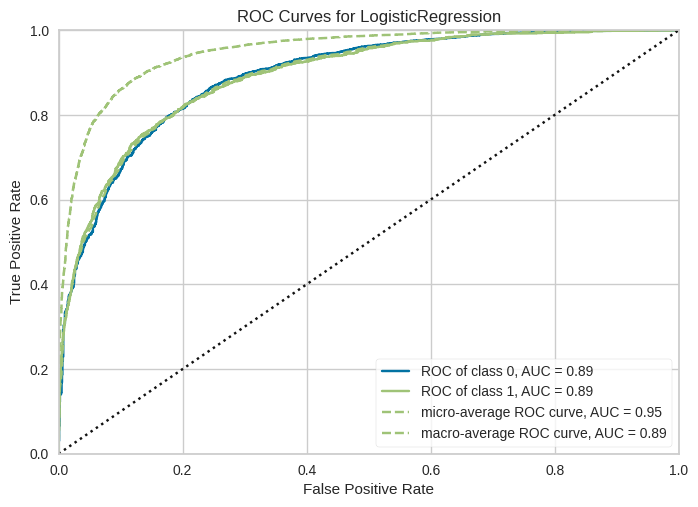

In [79]:
plot_model(best_model, plot = 'auc')

En esta gráfica ROC se muestra el rendimiento del modelo de regresión logística al clasificar entre las dos clases (0 y 1). Cada línea representa la curva ROC de una clase específica, y en ambos casos el área bajo la curva (AUC) es de 0.89. Esto indica que el modelo tiene una buena capacidad para distinguir entre ambas clases.

Además, la gráfica incluye los promedios micro y macro de las curvas ROC, con AUC de 0.95 y 0.89 respectivamente.
Recordemos:
* Micro-average: Considera cada instancia de cada clase individualmente, sin importar la clase a la que pertenece. Calcula el rendimiento acumulando los verdaderos positivos, falsos positivos y falsos negativos de todas las clases y luego genera la curva ROC. Es útil cuando se quiere evaluar el rendimiento general del modelo, especialmente si tenemos clases desbalanceadas, ya que da más peso a las clases con más ejemplos.

* Macro-average: Calcula la curva ROC y el AUC de cada clase individualmente y luego hace el promedio de esos valores. Da igual peso a cada clase, sin importar su tamaño. Es útil para ver el rendimiento medio del modelo en todas las clases, pero puede no reflejar bien el rendimiento general si las clases están desbalanceadas.

El promedio micro indica el rendimiento global del modelo, y el valor de 0.95 sugiere un excelente desempeño cuando se consideran todas las predicciones, mientras que el promedio macro (0.89) muestra el rendimiento promedio por clase, en este caso, la buena capacidad de discriminación en ambas clases de forma equilibrada.

En general, la curva se mantiene cerca de la esquina superior izquierda, lo cual es deseable ya que muestra que el modelo logra un buen balance entre la tasa de verdaderos positivos y la tasa de falsos positivos.

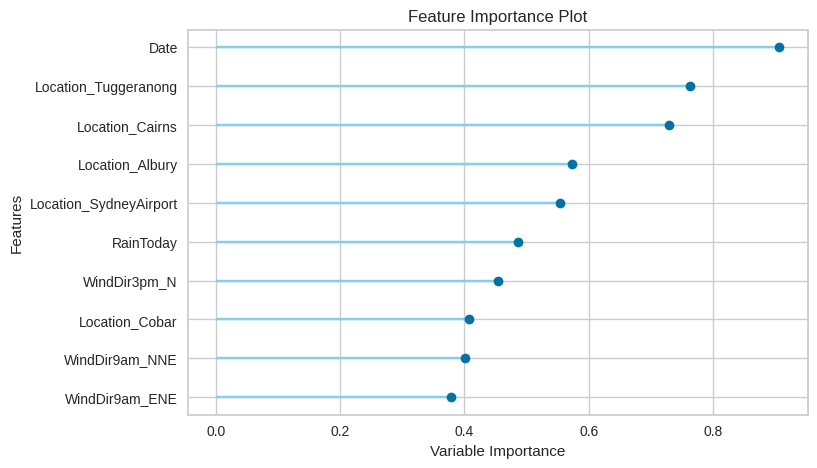

In [80]:
plot_model(best_model, plot = 'feature')

En esta gráfica se muestran las características más importantes para predecir la variable objetivo.

La característica "Date" es la más influyente, seguida de varias ubicaciones específicas como "Location_Tuggeranong", "Location_Cairns" y "Location_Albury". La variable "RainToday" también es relevante, lo cual es lógico ya que la lluvia de hoy puede indicar la posibilidad de lluvia al día siguiente.

Las direcciones del viento a distintas horas ("WindDir3pm_N", "WindDir9am_NNE" y "WindDir9am_ENE") también aportan valor al modelo. Este análisis de importancia sugiere que tanto la ubicación como factores relacionados con el viento y la lluvia actual son claves en el modelo de predicción de lluvia.

## **Comparación de modelos**
Para comparar los modelos usaremos la metrica f1-score para ambas clases


|<font size=4>Modelo<font>|<font size=4>f1-score-c0<font>|<font size=4>f1-score-c1<font>|
|-|-|-|
|<font size=4>Regresión logistica best threshold<font>|<font size=4>0.925<font>|<font size=4>0.633<font>|
|<font size=4>Regresión logistica estandar<font>|<font size=4>0.884<font>|<font size=4>0.619<font>|
|<font size=4>Regresión logistica Optuna<font>|<font size=4>0.883<font>|<font size=4>0.617<font>|
|<font size=4>Regresión logistica AutoML<font>|<font size=4> 0.930<font>|<font size=4>0.606<font>|
|<font size=4>Base<font>|<font size=4>0.90<font>|<font size=4>0<font>|



La comparación de modelos muestra una mejora significativa al utilizar regresión logística frente al modelo base. Aunque el modelo base alcanza un f1-score de 0.90 para la clase 0, su desempeño para la clase 1 es inexistente, lo cual indica que no es capaz de detectar correctamente esa categoría. En cambio, el modelo de regresión logística no solo mantiene un f1-score elevado para la clase 0 (0.92), sino que también mejora notablemente en la clase 1, alcanzando un f1-score de 0.63. Esta diferencia sugiere que la regresión logística es mucho más equilibrada y efectiva al predecir ambas clases, lo que la convierte en una opción más robusta para este problema.

Además, se puede observar que la Regresión Logística con Best Threshold ofrece el mejor equilibrio entre las clases, con un f1-score de 0.925 para la clase 0 y 0.633 para la clase 1. Esto la convierte en la opción más robusta para manejar tanto la clase mayoritaria como la minoritaria.

En comparación, el modelo de Regresión Logística estándar y el de Optuna presentan valores muy similares, con un f1-score de alrededor de 0.884 para la clase 0 y 0.619-0.617 para la clase 1. Aunque estos modelos son consistentes, su desempeño es ligeramente inferior al de la configuración con Best Threshold, especialmente en la clase minoritaria.

Por otro lado, el modelo generado por AutoML destaca con el f1-score más alto para la clase 0 (0.930), pero sacrifica desempeño en la clase 1, con un f1-score de 0.606, lo que sugiere que está más optimizado para la clase dominante y menos efectivo en manejar el desbalance de clases.

En conclusión, la Regresión Logística con Best Threshold es la mejor opción, al ofrecer un buen desempeño en ambas clases, mientras que los demás modelos, aunque útiles, tienden a favorecer más a la clase mayoritaria.